INSTITUTO INFNET \
MIT BIG DATA\
Big Data Analytics com R\
Prof.: Cassius Figueiredo\
Alunos : Mateus Magnus Paape, Kelvin Spaler, Felipe Delamar\
AVALIAÇÃO FINAL\



#### INSTRUÇÕES

Cada grupo deve preparar uma apresentação contendo:

##### 1) Apresentação dos conjuntos de dados definidos e, para cada um deles,apresentar as características principais do problema:

* 1.1) Descrição sucinta da aplicação;
* 1.2) Tipo de problema (classificação ou regressão). Cada base inclui uma proposta de pergunta que deverá ser o foco do trabalho com o conjunto de dados;
* 1.3) Número de variáveis e de registros;
* 1.4) Existência de valores ausentes. Caso existam, como trataram?

##### 2) Realizar a análise exploratória dos dados e discutir:

* 2.1) Estatísticas básicas: mínimos, máximos, médias, desvios, etc. de cadavariável;
* 2.2) Avaliar os histogramas e as características das distribuições das variáveis;
* 2.3) Verificar a existência de outliers e decidir o que fazer com eles;
* 2.4) Verificar correlações.

##### 3) Aplicar um modelo (visto em aula ou não) para entregar uma respostaembasada à pergunta apresentada. Documentar a aplicação do modelo.

##### 4) Apresentar as conclusões da análise realizada.

## 1) Apresentação dos conjuntos de dados definidos e, para cada um deles,apresentar as características principais do problema:

 ### bank client data:
 
   - age (numeric)
   - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - default: has credit in default? (categorical: "no","yes","unknown")
   - housing: has housing loan? (categorical: "no","yes","unknown")
   - loan: has personal loan? (categorical: "no","yes","unknown")
   
   ### related with the last contact of the current campaign:
   
   - contact: contact communication type (categorical: "cellular","telephone") 
   - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
   ### other attributes:
   
   - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   - previous: number of contacts performed before this campaign and for this client (numeric)
   - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
 ### social and economic context attributes
 
  - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  - cons.price.idx: consumer price index - monthly indicator (numeric)     
  - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  - euribor3m: euribor 3 month rate - daily indicator (numeric)
  - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


#### Bibliotecas Utilizadas

In [349]:
#suprimindo warnning
oldw <- getOption("warn")
options(warn = -1)
#graficos
library(ggplot2)
library(corrplot)
library(psych)
#seleções e manipulações de dados
library(dplyr)
library(psych)
#amostragem aleatoria 
library(ROSE)
#modelagem
library(caret)
library(e1071)

## 1) Apresentação dos conjuntos de dados definidos e, para cada um deles,apresentar as características principais do problema:

### 1.1) Descrição sucinta da aplicação;

- O Dataset:

O dataset reune contatos feitos durante uma campanha de marketing por telefone conduzida  por Banco Português com o objetivo de converter a adesão do cliente a investir em depósito a termo.

- O objetivo da Aplicação:

Estimar a propensão dos clientes, dado os dados conhecidos, à adesão do produto.

### 1.2) Tipo de problema (classificação ou regressão). Cada base inclui uma proposta de pergunta que deverá ser o foco do trabalho com o conjunto de dados

O problema é um problema de Regressão, poís é pedido a estimativa da propensão do cliente a aderir(variável contínua). Embora seja de nosso conhecimento que a regressão logistica é amplamente utilizada em problemas de classificação e durante fases desse trabalho obteremos para fim de mensuração do modelo classificações também.

### 1.3) Número de variáveis e de registros;

In [509]:
setwd("C:\\Users\\Pichau\\Documents\\Trabalho R\\r_works")

#APRESENTACAO DOS DADOS 
train_df=read.csv2("bank-additional-full.csv",sep = ';', dec= '.')
test_df=read.csv2("bank-additional.csv",sep = ';',dec= '.')


In [351]:
#numero de variaves e registros

print('o número de linhas do dataframe é :')
print(str(nrow(train_df)))


print('o número de colunas do dataframe é :')
print(str(ncol(train_df)))
 
 

[1] "o número de linhas do dataframe é :"
 int 41188
NULL
[1] "o número de colunas do dataframe é :"
 int 21
NULL


In [352]:
#numero de variaves e registros

print('o número de linhas do dataframe é :')
print(str(nrow(test_df)))


print('o número de colunas do dataframe é :')
print(str(ncol(test_df)))
 

[1] "o número de linhas do dataframe é :"
 int 4119
NULL
[1] "o número de colunas do dataframe é :"
 int 21
NULL


In [353]:
#colunas do dataset
names(train_df)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [354]:
str(train_df)
str(test_df)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

In [355]:
#inspecionando o dataframe 
head(train_df, n =5 )

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


#### Duplicidade de dados

In [356]:
#verificando linhas duplicadas
sum(duplicated(train_df))

[1] 12

Como o nosso dataframe não tem identificação única de usuário, não existe problema em haver linhas duplicadas. Mas ainda sim, somente 12 são identicas

In [357]:
 
na_df <- colSums(is.na(train_df))
vazio_df <-colSums(train_df == "") 

     
df = merge(x = na_df, y = vazio_df, by = c(na_df))
print(df)

        Row.names x y
1             age 0 0
2        campaign 0 0
3   cons.conf.idx 0 0
4  cons.price.idx 0 0
5         contact 0 0
6     day_of_week 0 0
7         default 0 0
8        duration 0 0
9       education 0 0
10   emp.var.rate 0 0
11      euribor3m 0 0
12        housing 0 0
13            job 0 0
14           loan 0 0
15        marital 0 0
16          month 0 0
17    nr.employed 0 0
18          pdays 0 0
19       poutcome 0 0
20       previous 0 0
21              y 0 0


Apesar do meta arquivo esclarecer que o faltante é "unknow" verificamos dados "" ou na tbm

In [358]:
unknown_df <-colSums(train_df == "unknown") 
sum <- colSums(train_df!="")
perc <- round(unknown_df/sum,4)
print(unknown_df)
print(perc)

           age            job        marital      education        default 
             0            330             80           1731           8597 
       housing           loan        contact          month    day_of_week 
           990            990              0              0              0 
      duration       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
             y 
             0 
           age            job        marital      education        default 
        0.0000         0.0080         0.0019         0.0420         0.2087 
       housing           loan        contact          month    day_of_week 
        0.0240         0.0240         0.0000         0.0000         0.0000 
      duration       campaign          pdays       previ

Temos 20% dos dados desconhecidos para a variável default


## 2) Realizar a análise exploratória dos dados e discutir:

### 2.1) Estatísticas básicas: mínimos, máximos, médias, desvios, etc. de cada variável;

In [359]:
summary(train_df, maxsum = max(lengths(lapply(train_df, unique))))

      age                   job            marital     
 Min.   :17.00   admin.       :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar  : 9254   married :24928  
 Median :38.00   entrepreneur : 1456   single  :11568  
 Mean   :40.02   housemaid    : 1060   unknown :   80  
 3rd Qu.:47.00   management   : 2924                   
 Max.   :98.00   retired      : 1720                   
                 self-employed: 1421                   
                 services     : 3969                   
                 student      :  875                   
                 technician   : 6743                   
                 unemployed   : 1014                   
                 unknown      :  330                   
               education        default         housing           loan      
 basic.4y           : 4176   no     :32588   no     :18622   no     :33950  
 basic.6y           : 2292   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    

 - A variavel default não parece trazer ganhos ao modelo em termos interpretativos já que a classe yes é de apenas 3 e desconhecido e não são todo o resto.
 - Transformar Age em factors pode trazer ganhos em modelos de classificação. 
 - Retirar duration do modelo, pois como o metarquivo diz: é uma variável que não pode ser sabida antes da campanha e após a campanha já é sabido o resultado y.
 - Classe alvo(y) é bastante desbalanceada
 - Pdays, apesar de numérica não trouxe estatísticas relevantes para análise em uma primeira inspeção. Precisará ser tratada.


### 2.2) Avaliar os histogramas e as características das distribuições das variáveis;

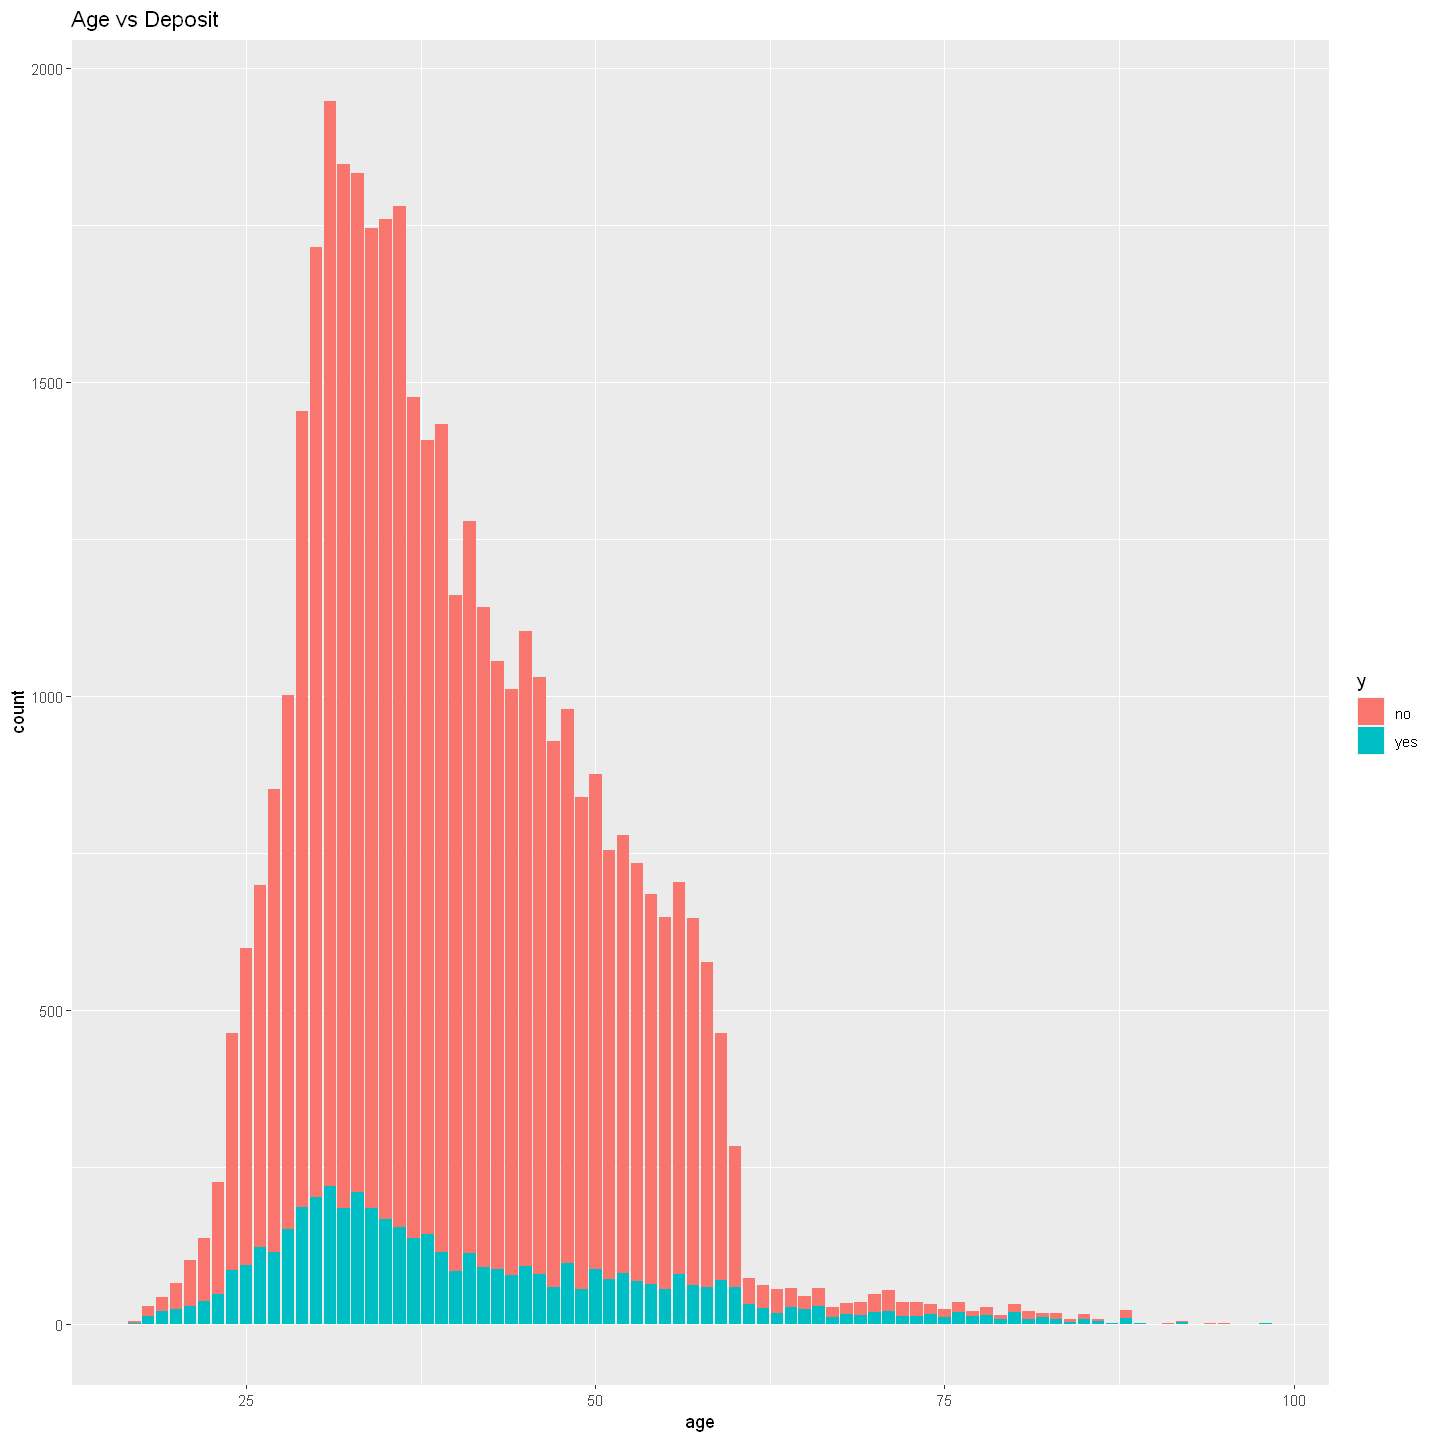

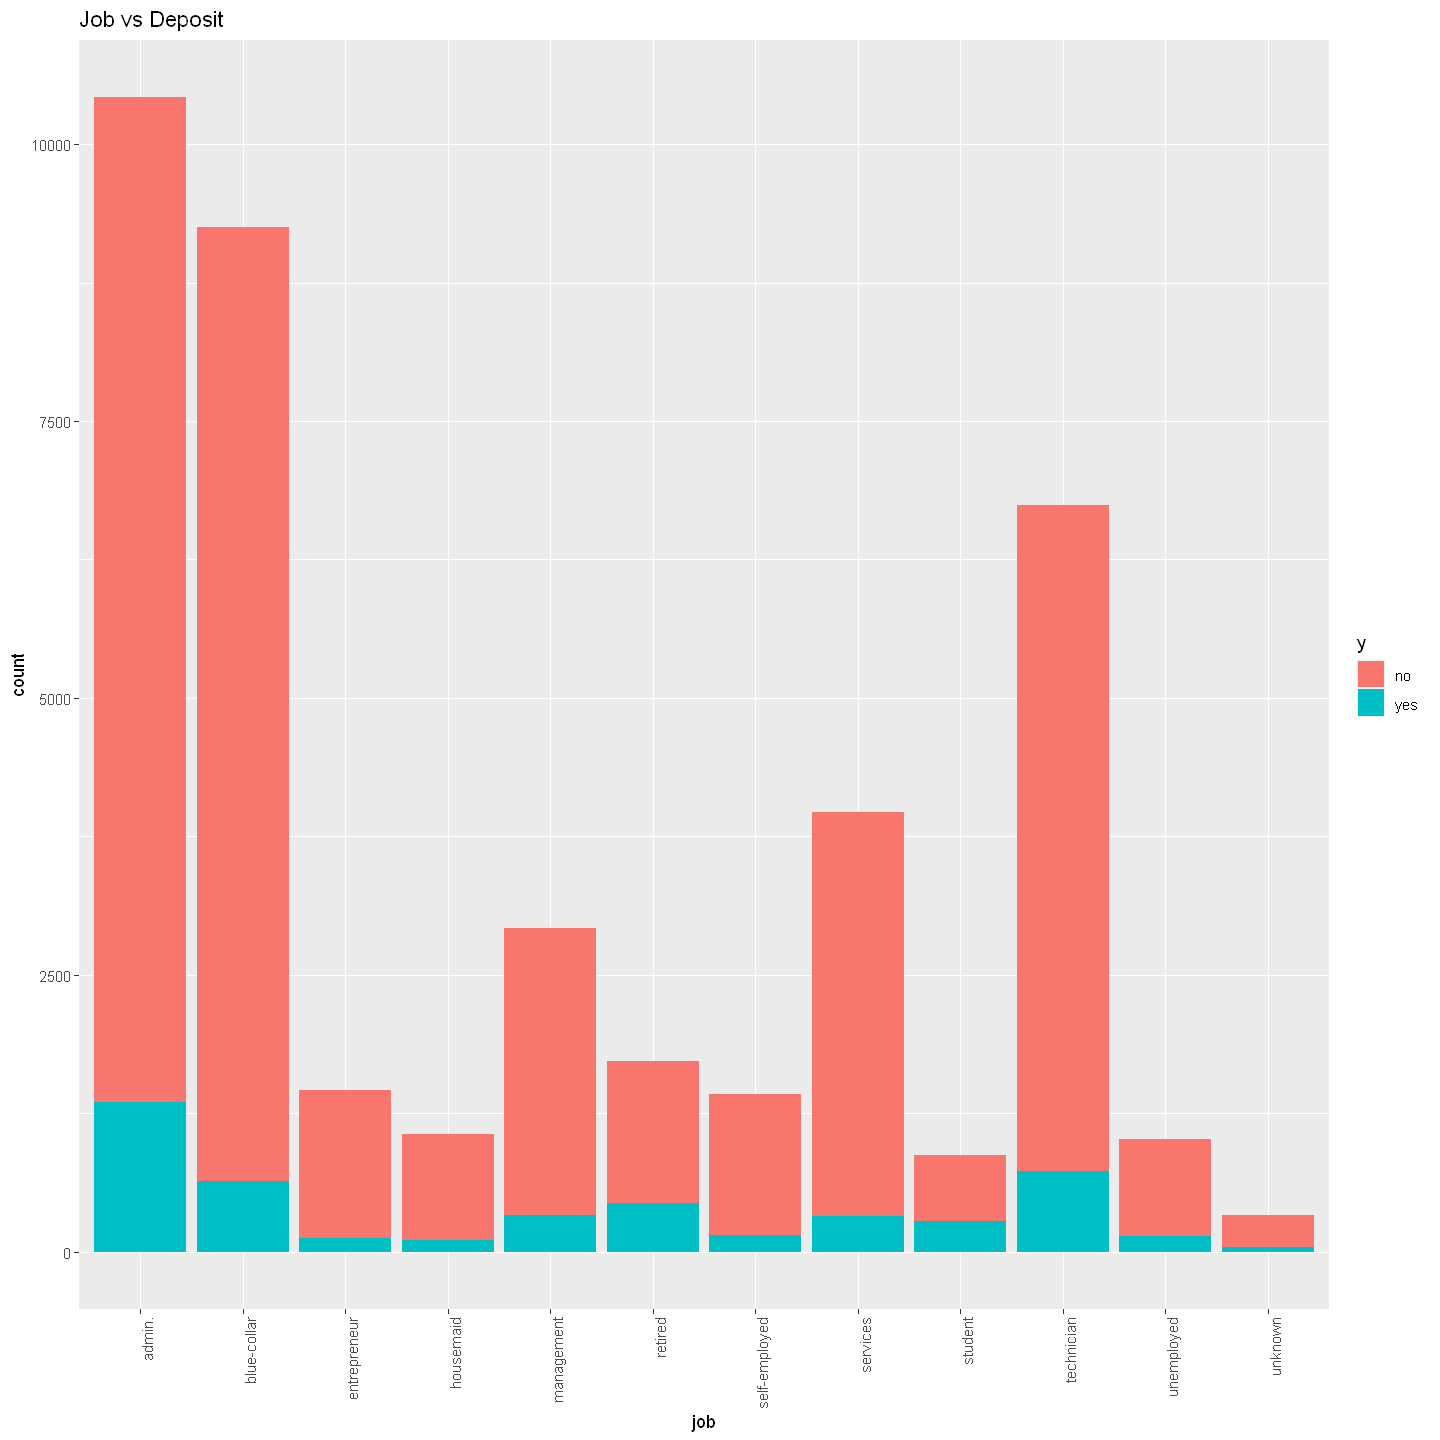

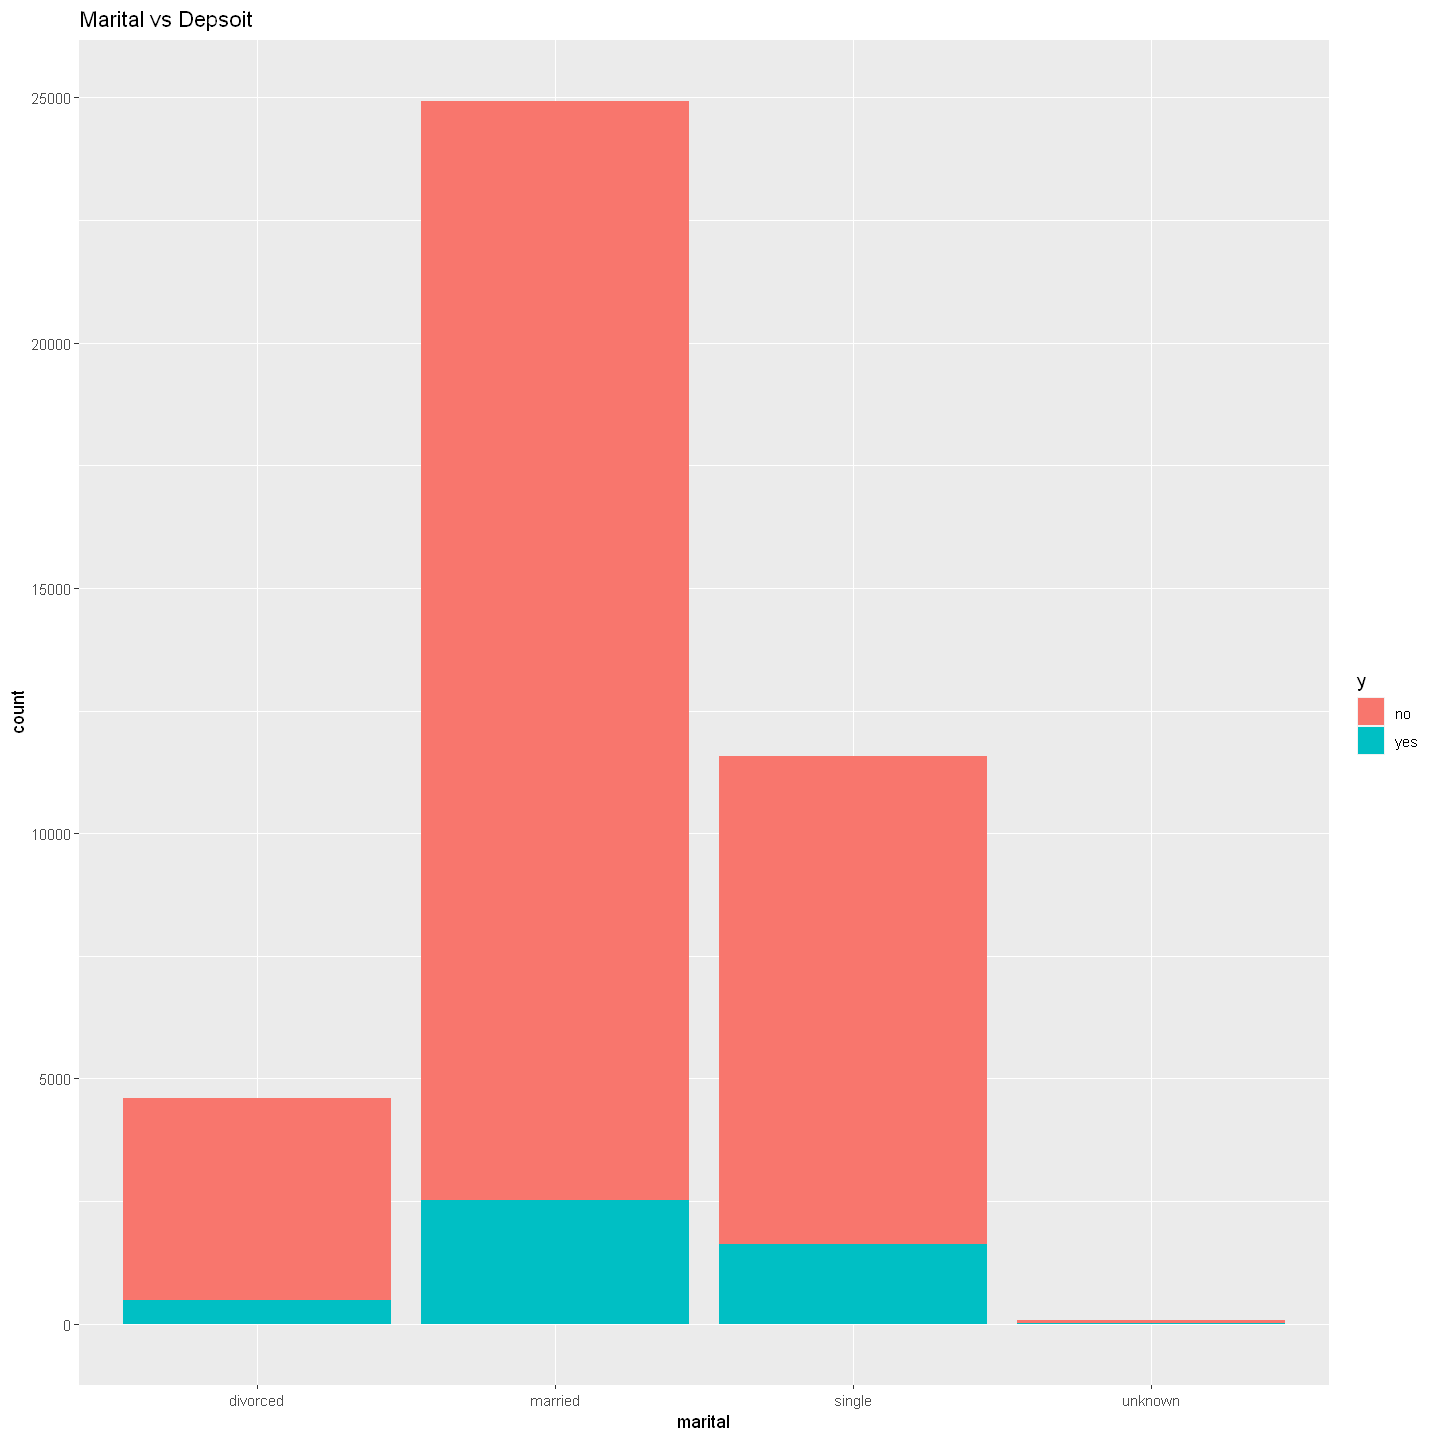

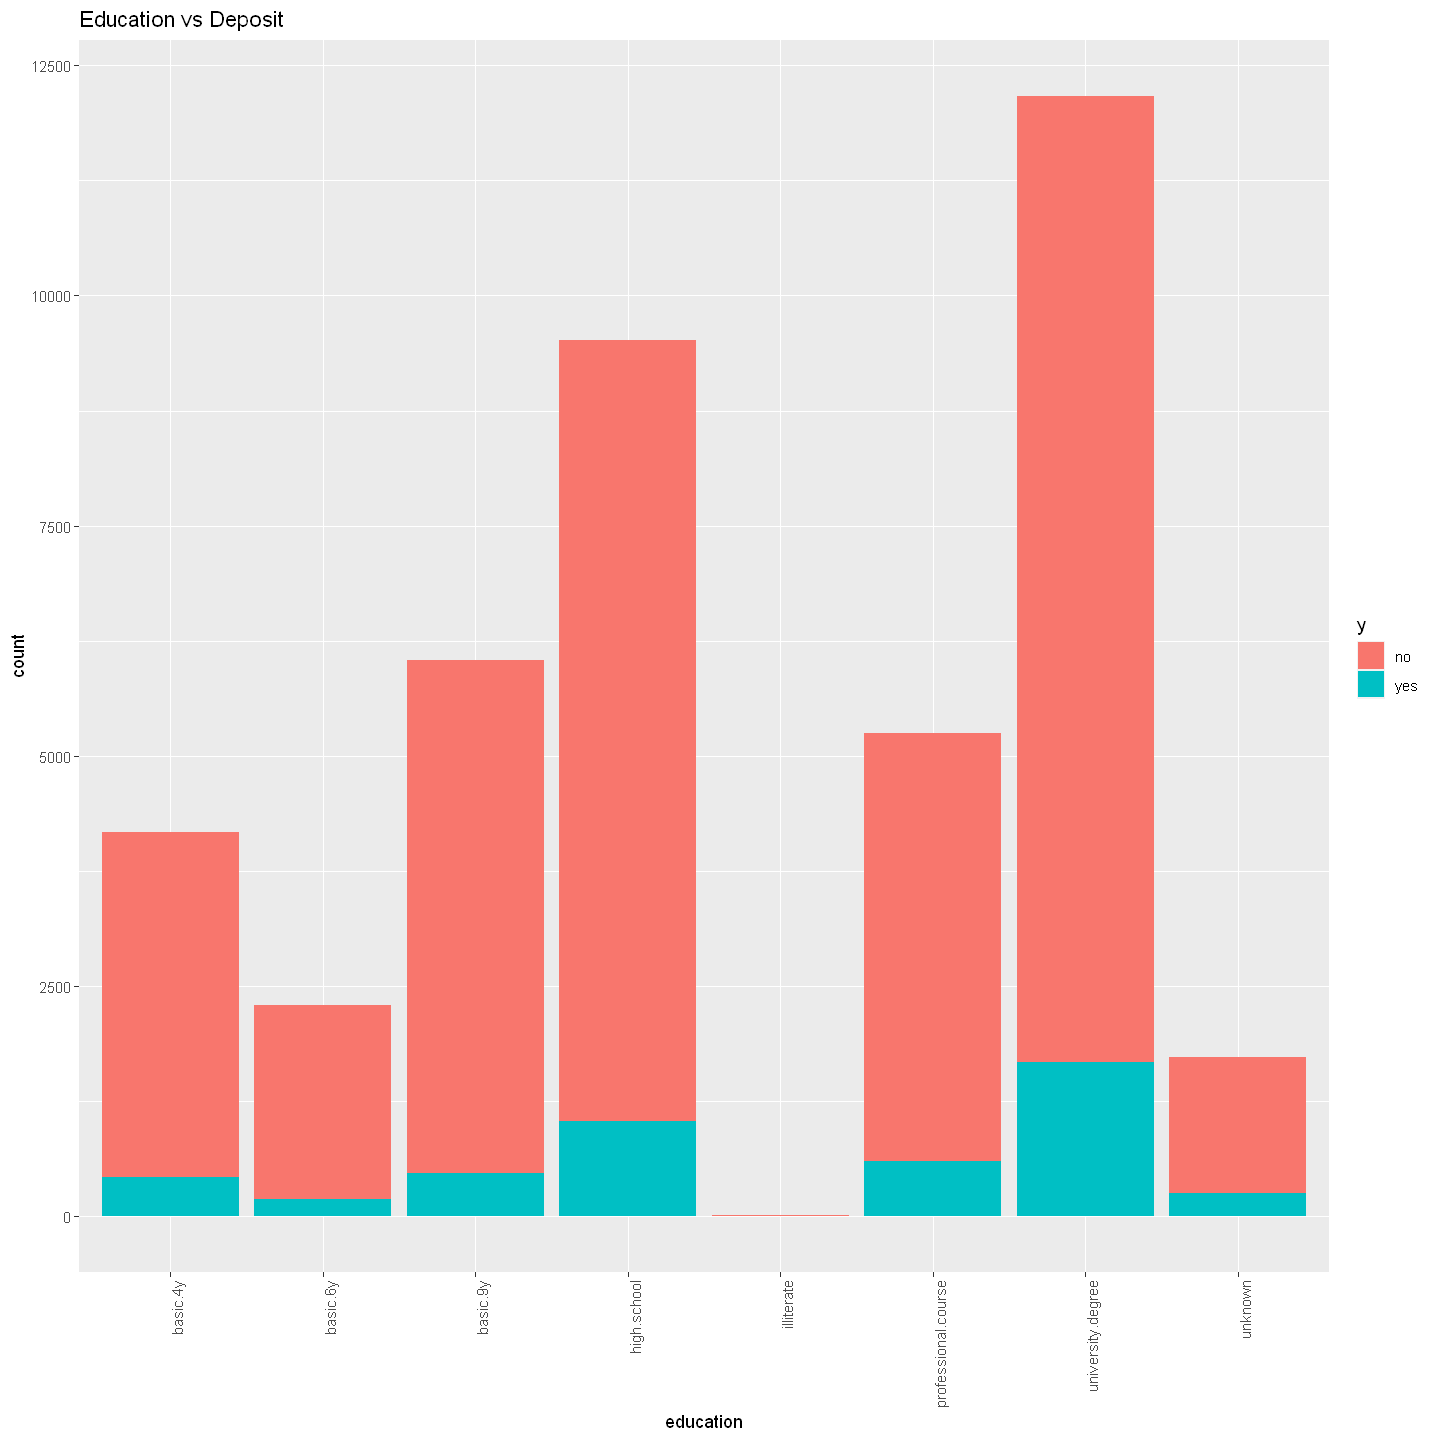

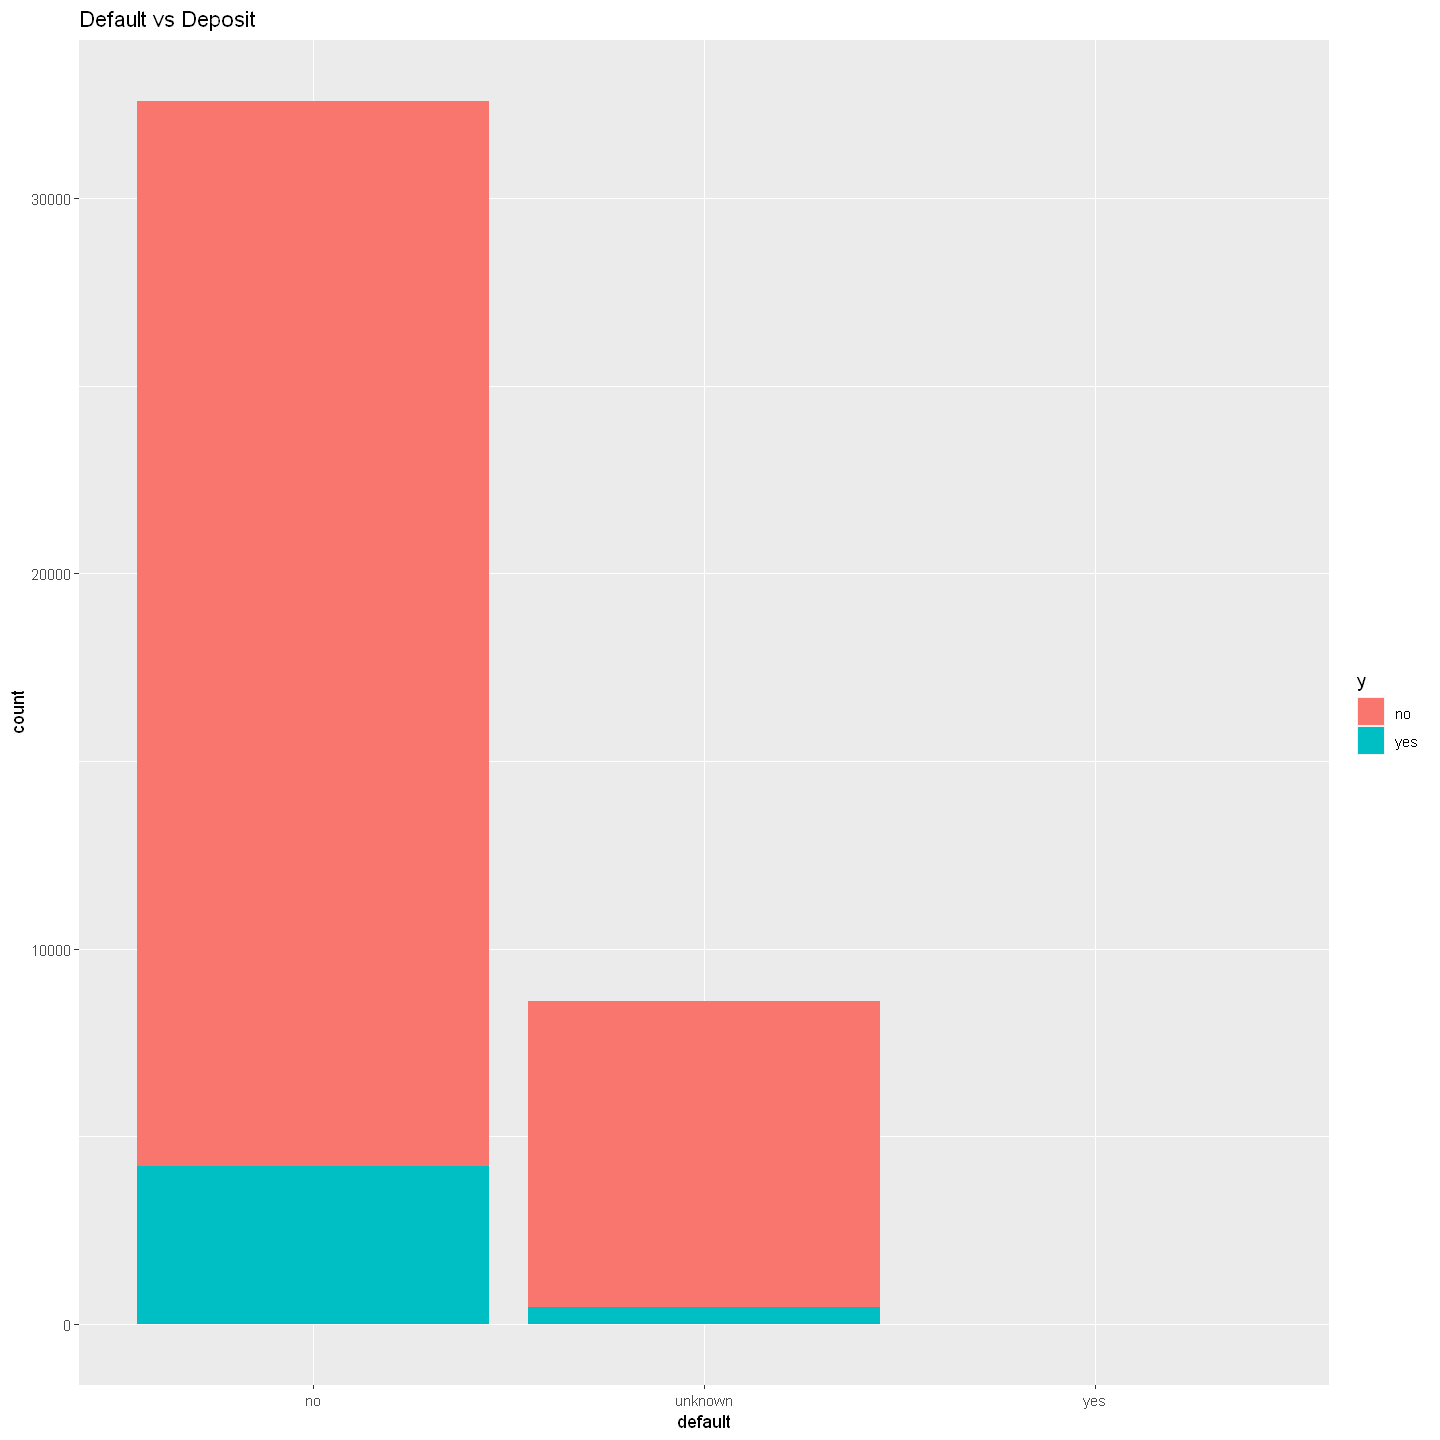

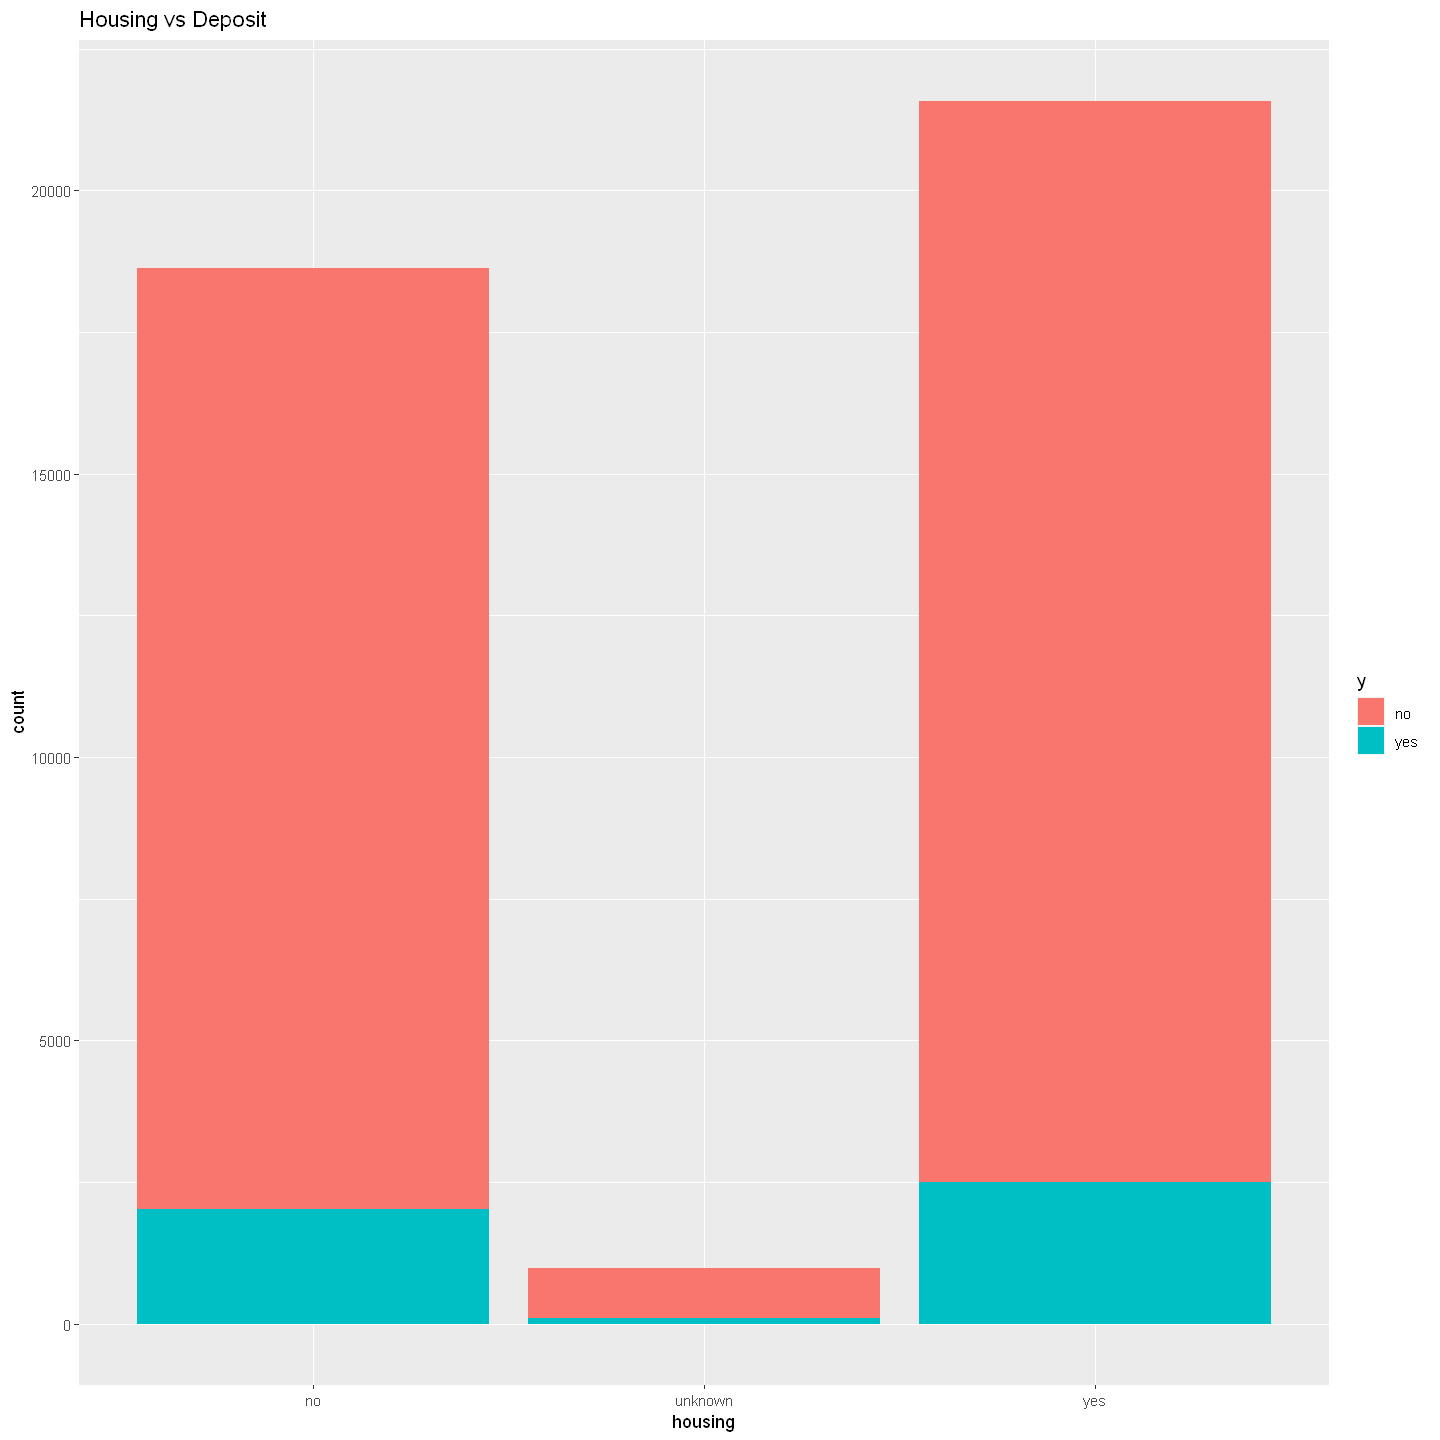

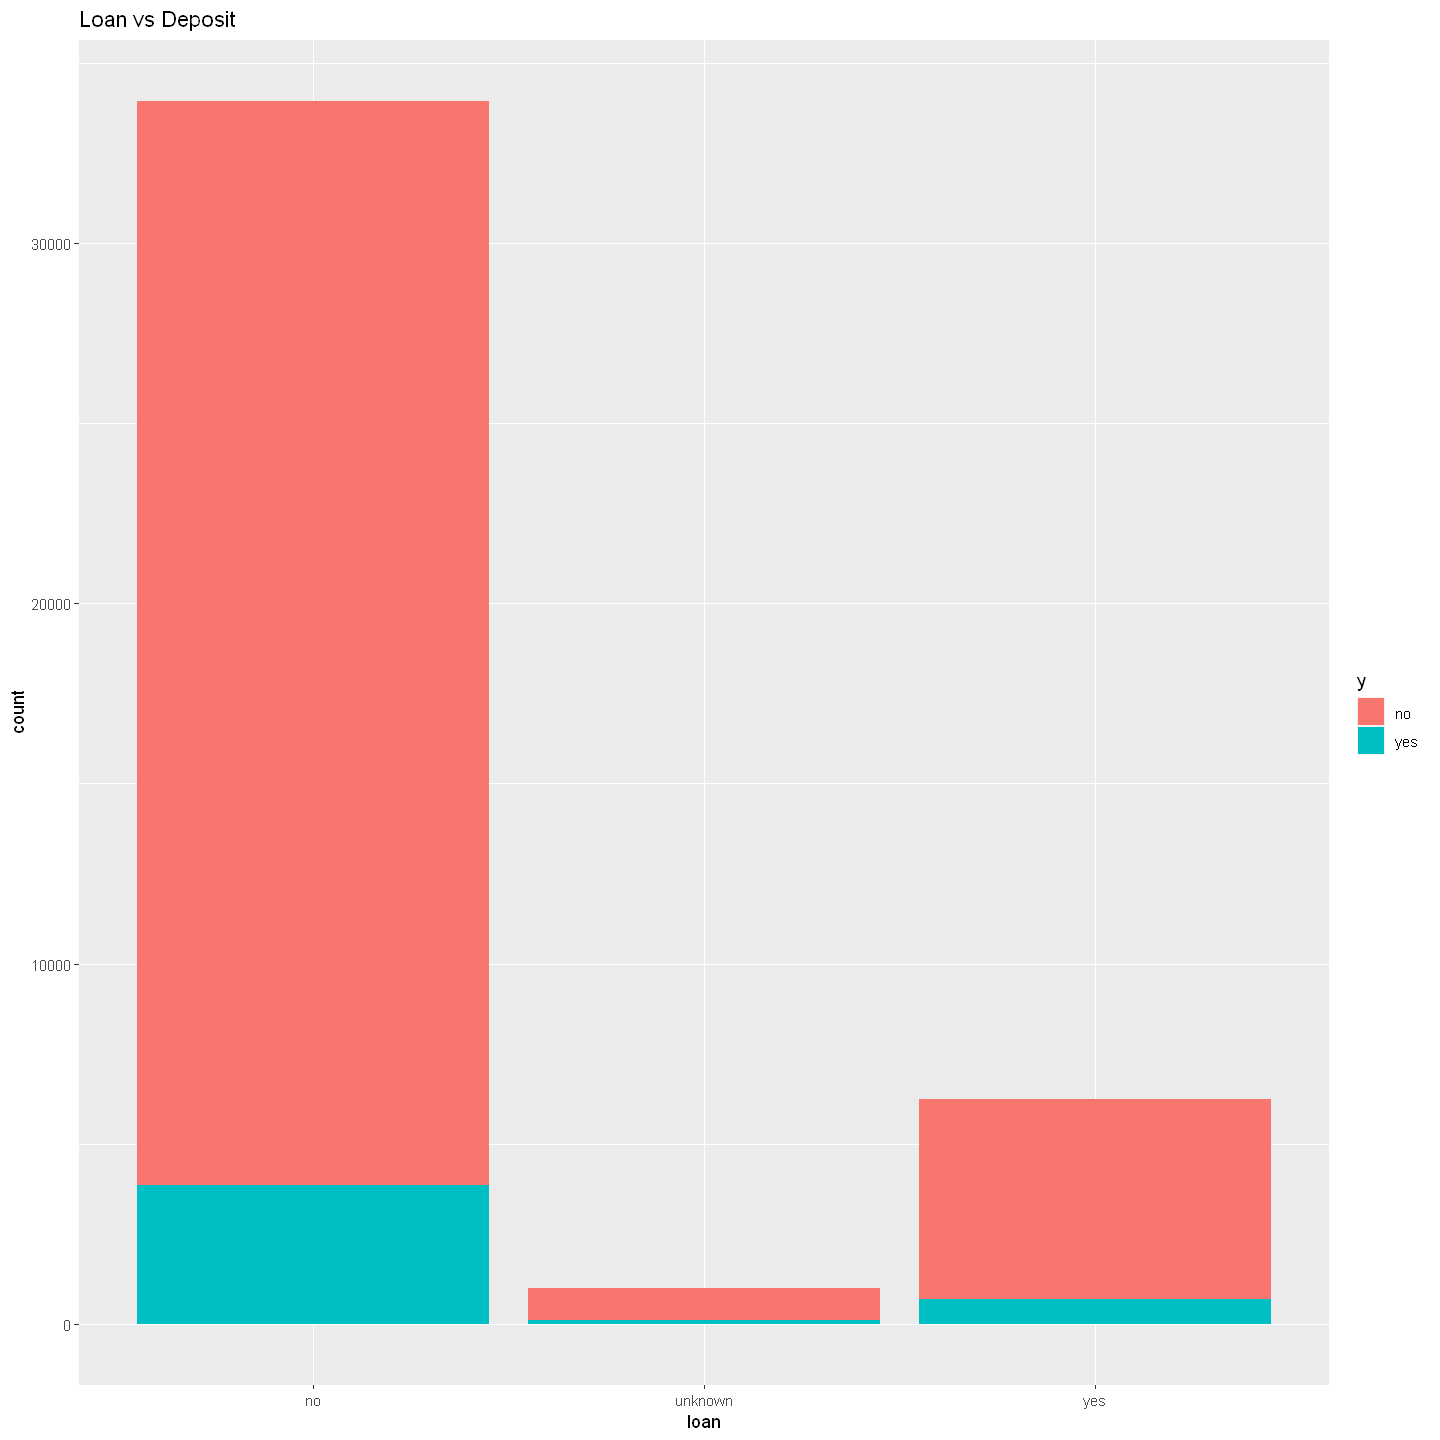

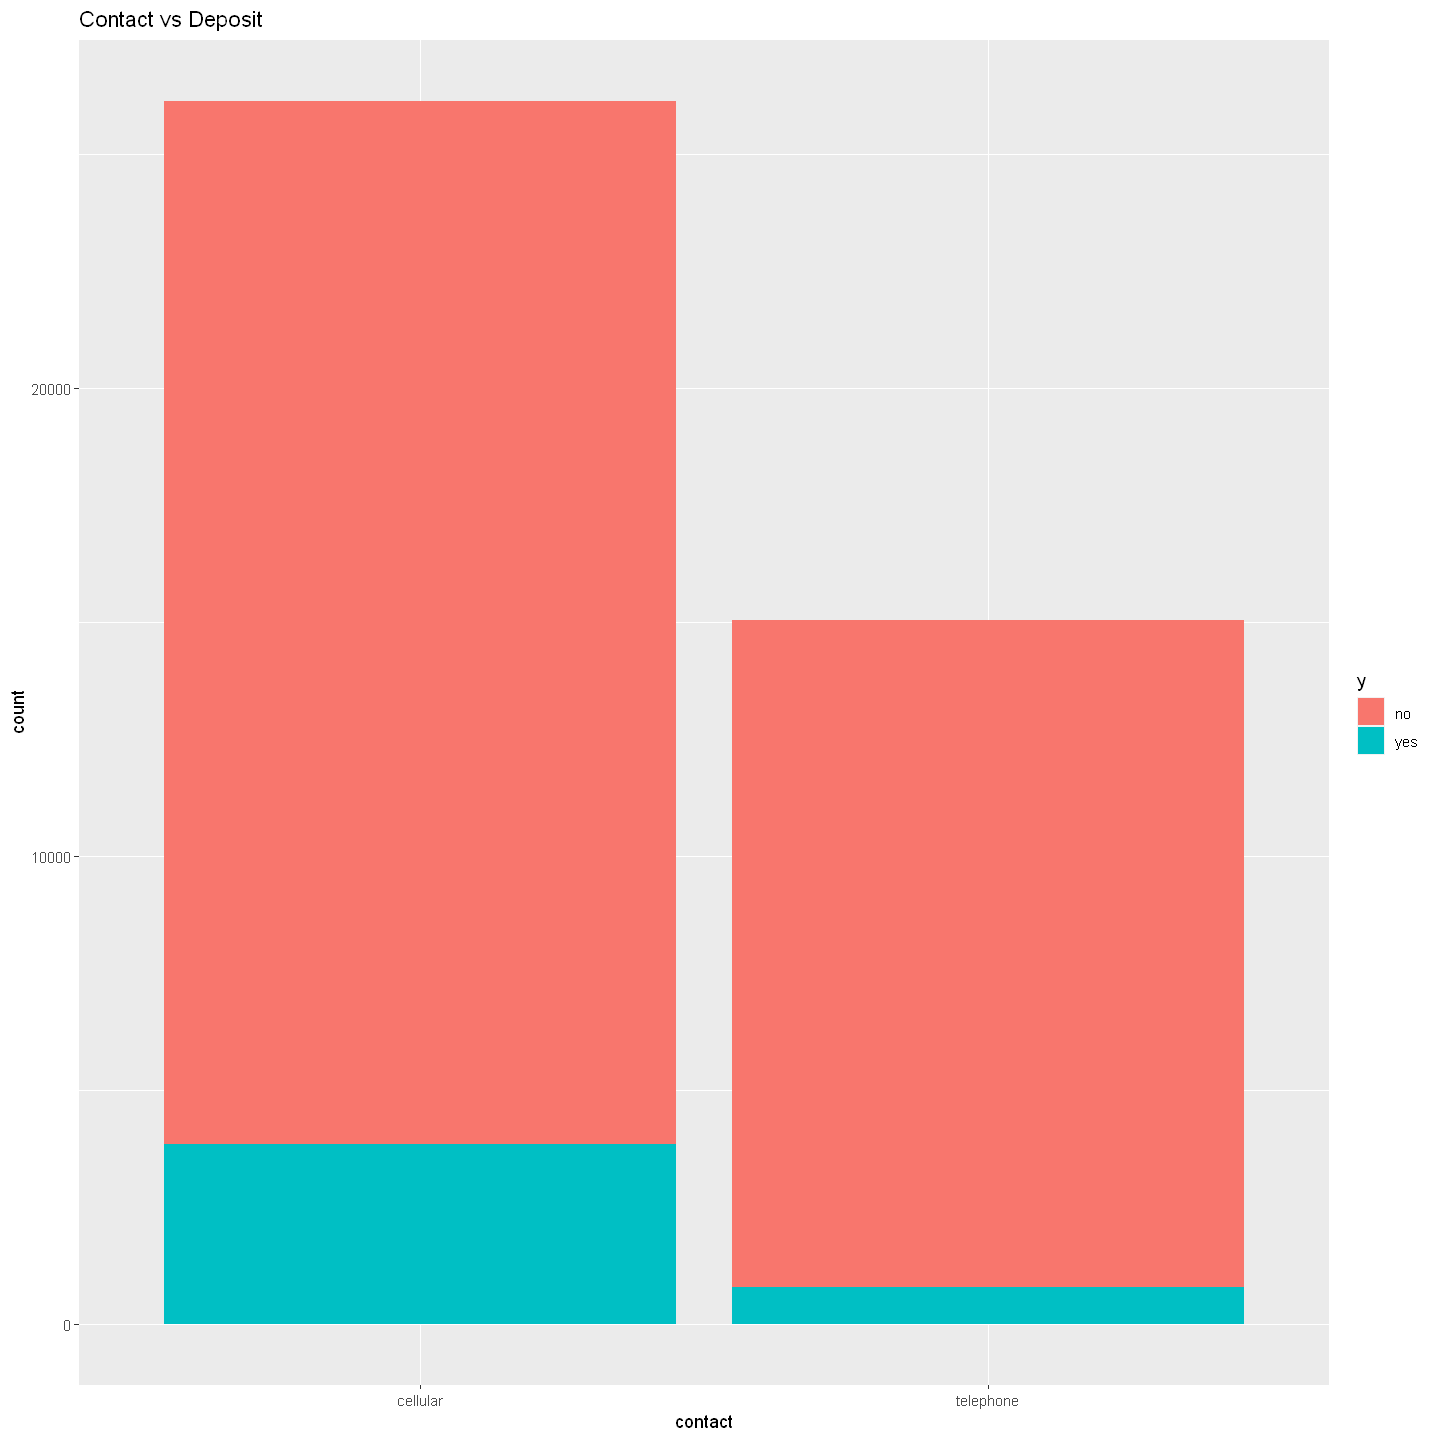

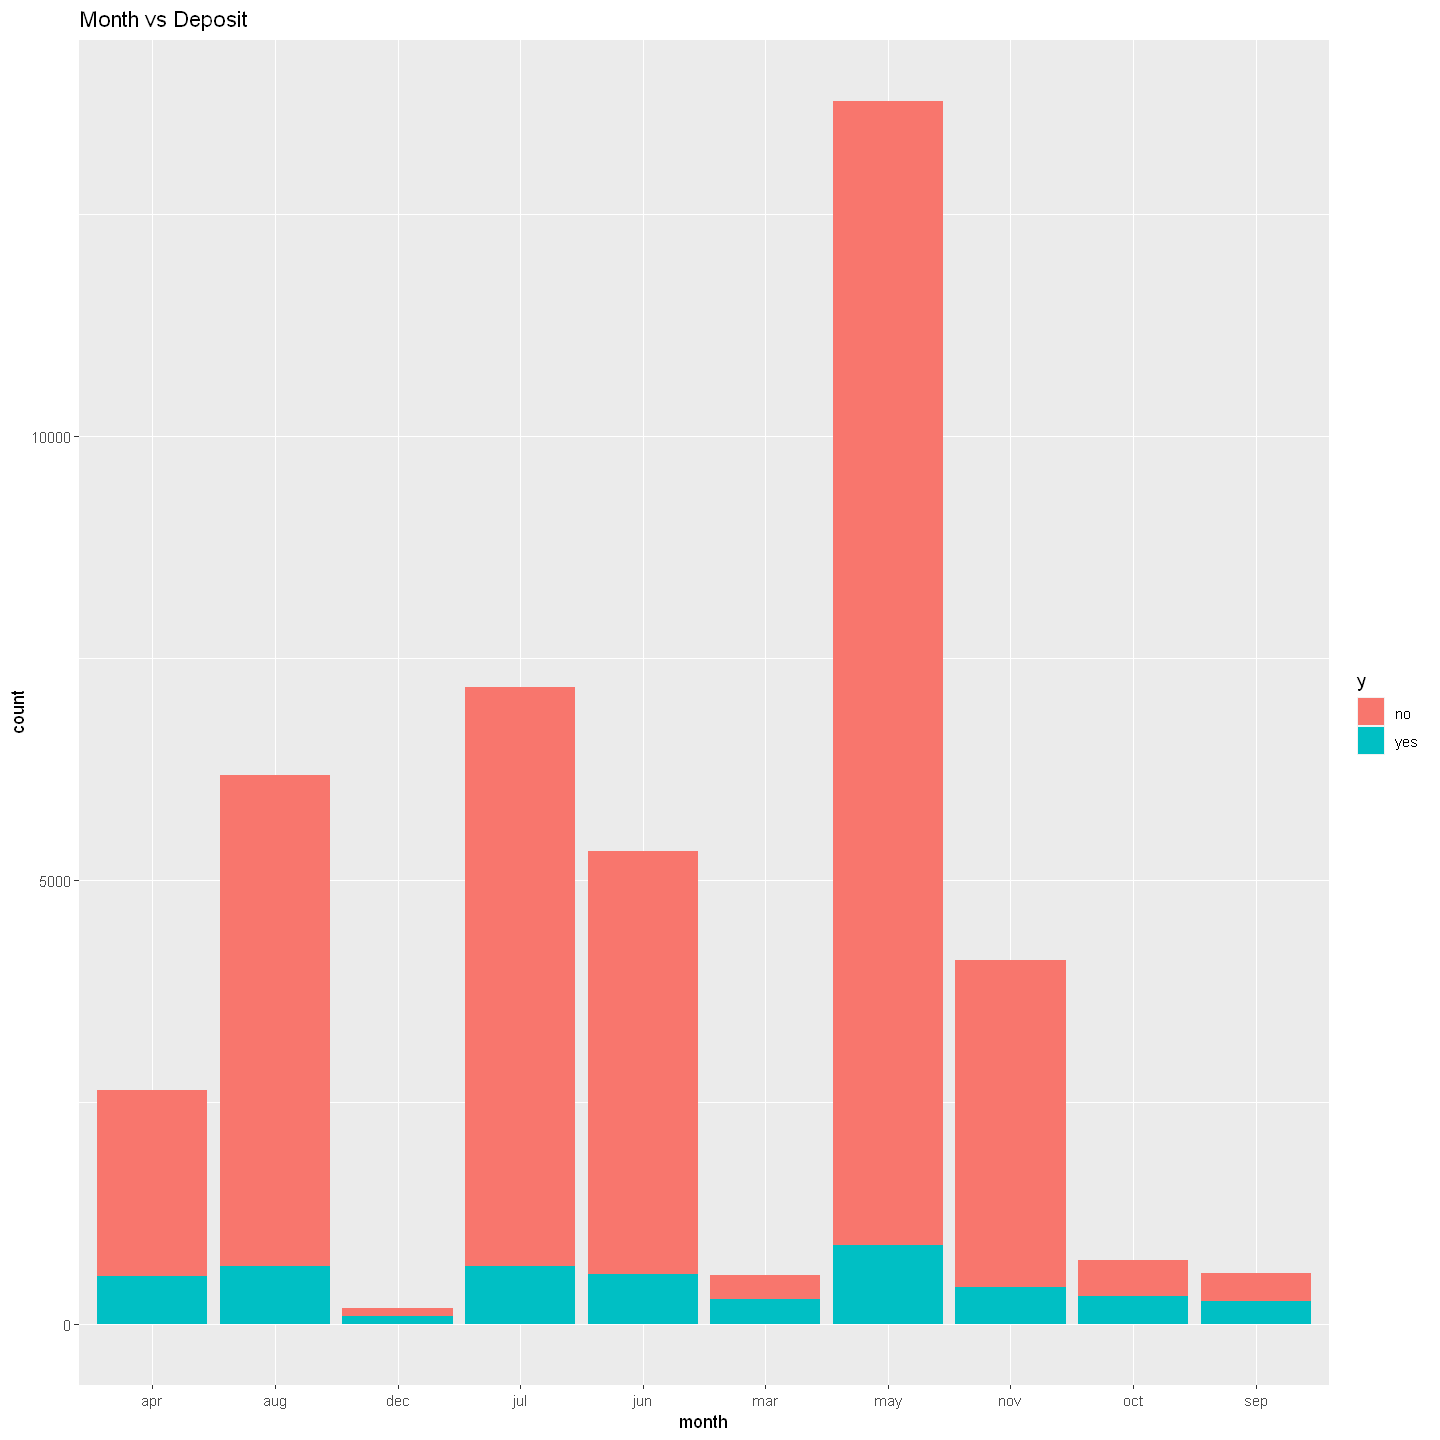

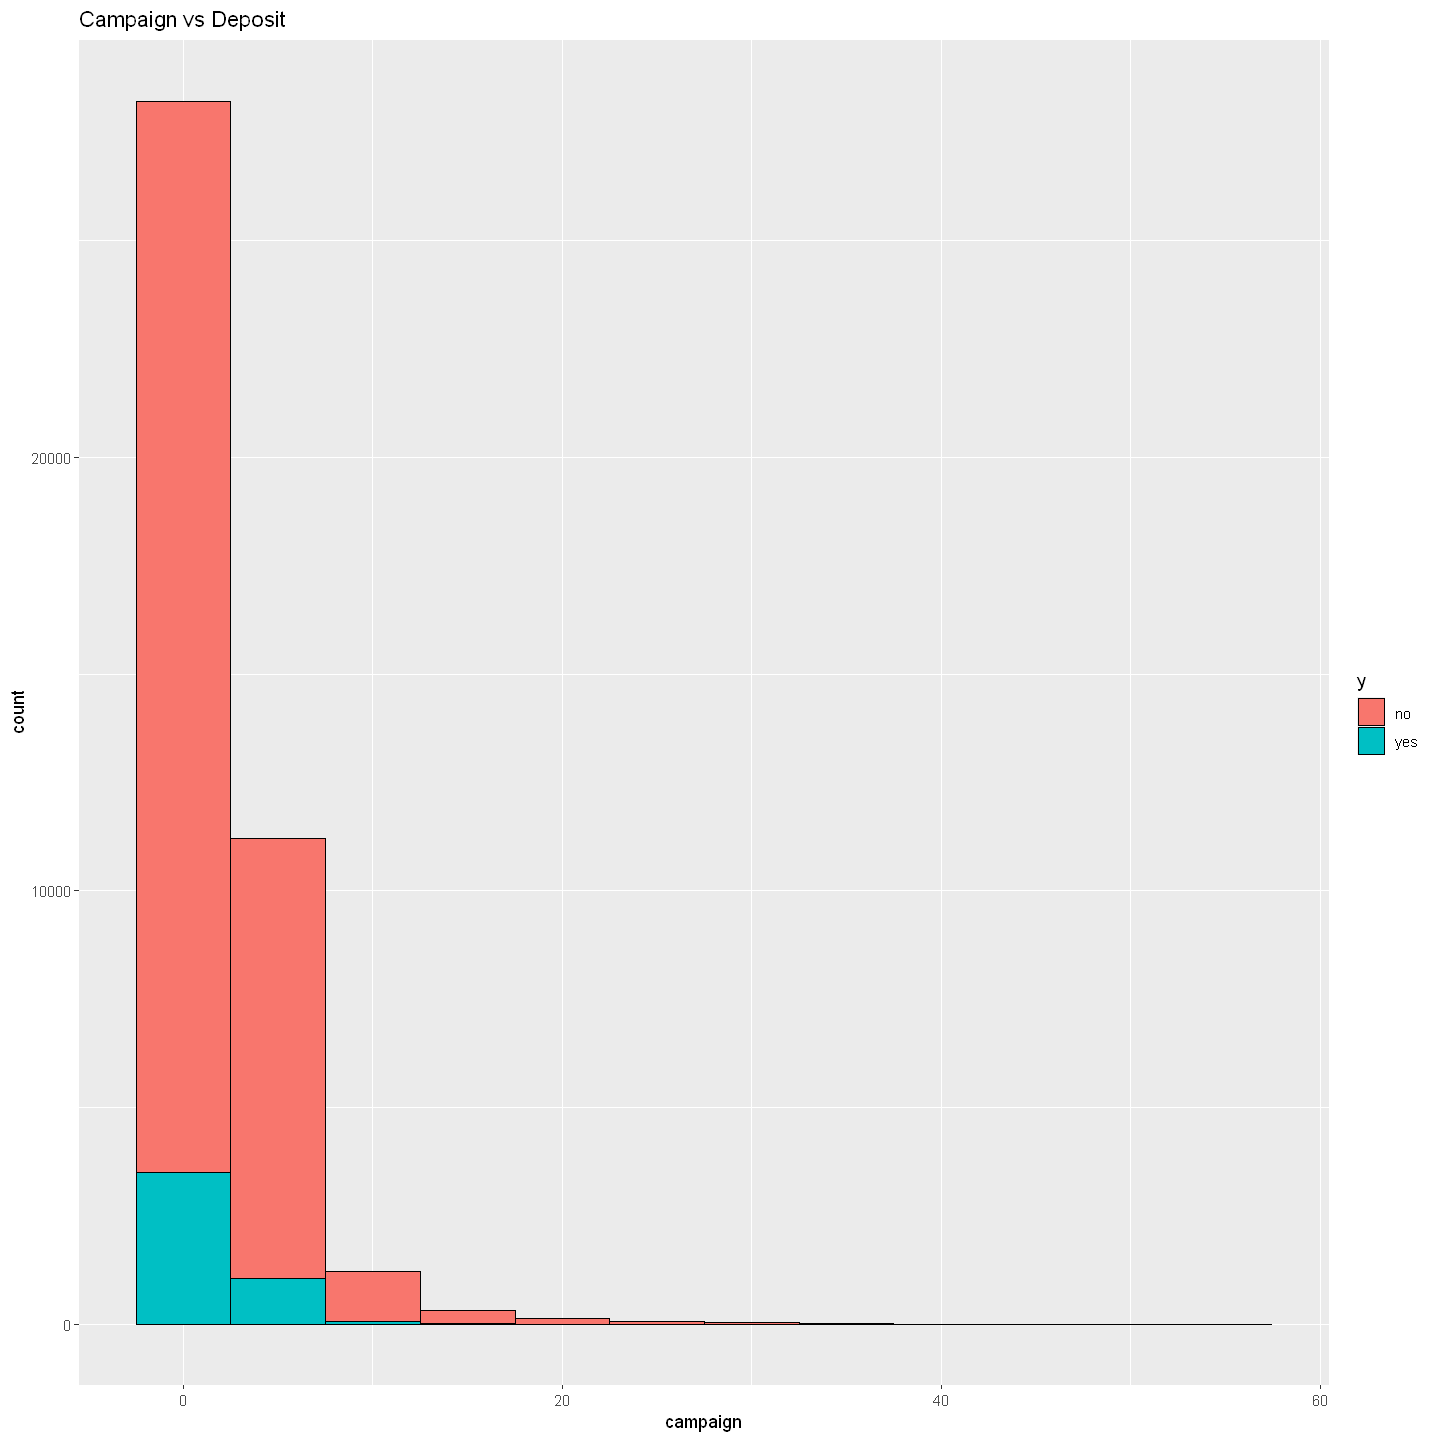

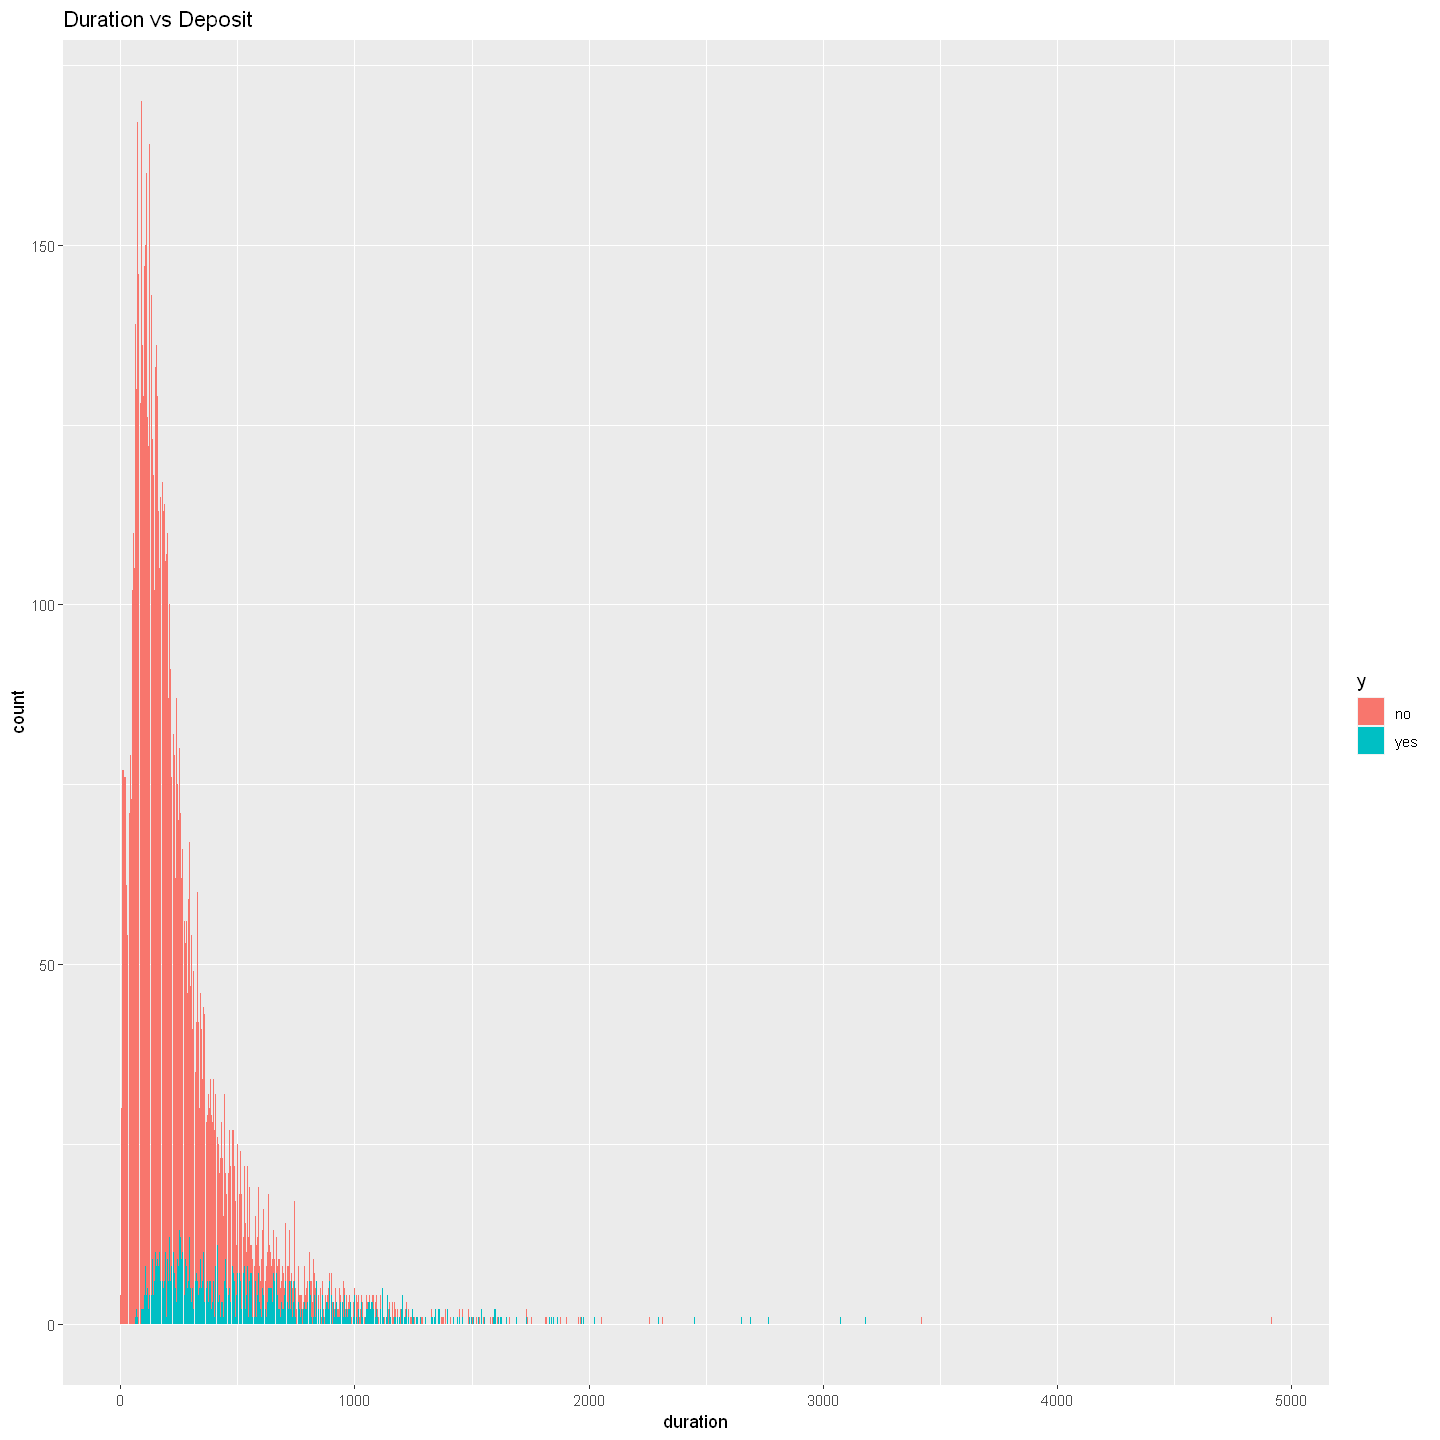

In [471]:
#EDA
library(ggplot2)
ggplot(train_df,aes(age,fill=y))+geom_bar()+
  ggtitle("Age vs Deposit")->p1
p1
#older people have deposit rate

ggplot(train_df,aes(job,fill=y))+geom_bar()+
  ggtitle("Job vs Deposit")+ theme(axis.text.x = element_text(angle = 90, hjust = 1)) ->p2
p2
#people who are at the management deposit more followed by technicians and bluecollars

ggplot(train_df,aes(marital,fill=y))+geom_bar()+
  ggtitle("Marital vs Depsoit")->p3
p3
#married people deposit more than others

ggplot(train_df,aes(education,fill=y))+geom_bar()+
  ggtitle("Education vs Deposit")+ theme(axis.text.x = element_text(angle = 90, hjust = 1)) ->p4
p4
#people who have secondary level education deposit more followed by 
#people who have tertiary level education

ggplot(train_df,aes(default,fill=y))+geom_bar()+
  ggtitle("Default vs Deposit") ->p5
p5
#people who have no credit default deposit more and people who have credit default
#almost have no deposit

ggplot(train_df,aes(housing,fill=y))+geom_bar()+
  ggtitle("Housing vs Deposit")->p7
p7
#people who dont have house loan deposit more than people who have home loans.

ggplot(train_df,aes(loan,fill=y))+geom_bar()+
  ggtitle("Loan vs Deposit")->p8
p8
#people who dont have personal loan deposit more than people who have personal loans

ggplot(train_df,aes(contact,fill=y))+geom_bar()+
  ggtitle("Contact vs Deposit")->p9
p9
#people who are contacted by cellular deposit more

ggplot(train_df,aes(month,fill=y))+geom_bar()+
  ggtitle("Month vs Deposit")->p10
p10
#people who are contacted in the month of may deposit more followed by august,july and april

ggplot(train_df,aes(campaign))+geom_histogram(aes(fill=y),color="black",binwidth =5)+
  ggtitle("Campaign vs Deposit")->p11
p11
#people who are contacted for less than 5 times deposit more

ggplot(train_df,aes(duration,fill=y))+geom_bar()+
  ggtitle("Duration vs Deposit")->p12
p12
#people whose duration of contact is less than 5 minutes deposit more 
#but people whose duration of contact exceeded 5 minutes have higher deposit rate

#suprimindo warnning
oldw <- getOption("warn")
options(warn = -1)

### 2.3) Verificar a existência de outliers e decidir o que fazer com eles;


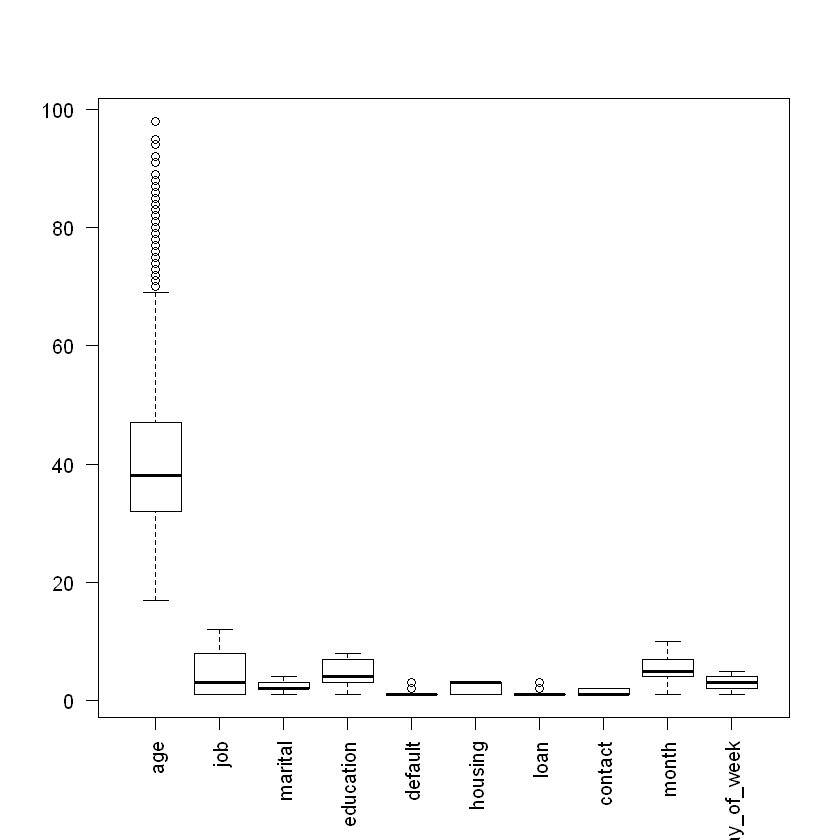

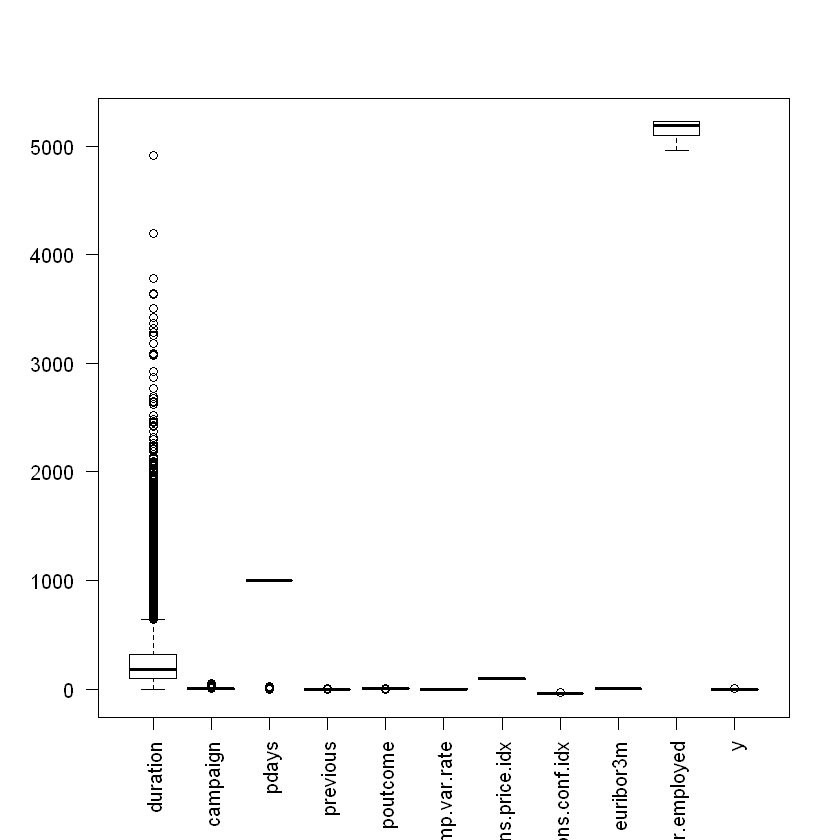

In [16]:
boxplot(train_df[1:10],horizontal = FALSE,las=2)
boxplot(train_df[11:21],horizontal = FALSE,las=2)

- Verificamos alguns Outliers que precisarão de tratamento na idade.
- Não nos preocuparemos com os Outliers em duration e default pois essas variáveis serão retiradas do dataset
- Trataremos a variável pdays posteriormente.

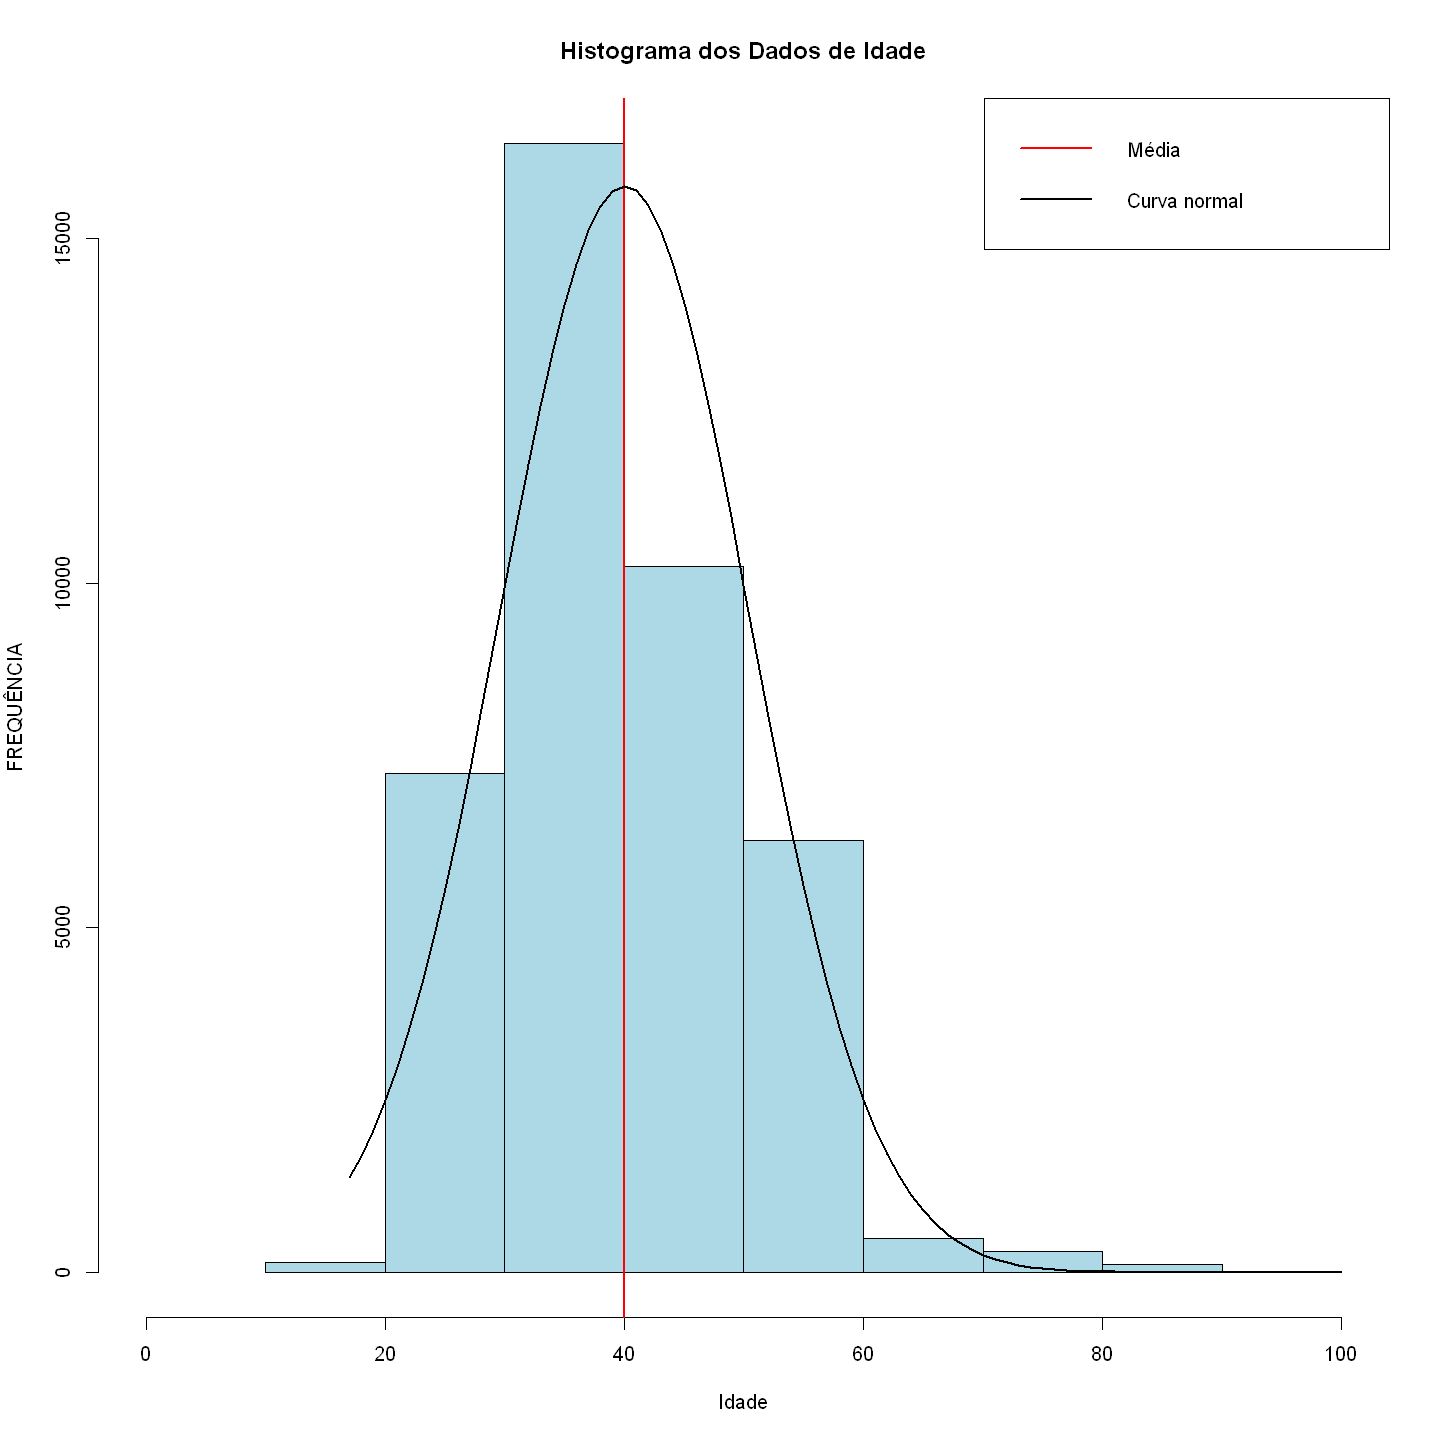

In [472]:
histograma<-hist(train_df$age,  col="lightblue", border="black", xlab="Idade", ylab="FREQUÊNCIA", main="Histograma dos Dados de Idade", breaks=10, xlim=c(0, 100)) #breaks: muda o número de barras do gráfico
abline(v=mean(train_df$age), col="red", lwd=2) #Adicionando uma linha vertical vermelha representando a média dos dados
# Acrescentando a curva normal ao gráfico
xfit <- seq(min(train_df$age), max(train_df$age))
yfit <- dnorm(xfit, mean=mean(train_df$age), sd=sd(train_df$age))
yfit <- yfit*diff(histograma$mids[1:2]) * length(train_df$age)
lines(xfit, yfit, col="black", lwd=2)
# Adicionando a legenda
legend(x="topright", #Posição da legenda
       c("Média", "Curva normal"), #Nome da legenda
       col=c("red", "black"), #Cor
       lty=c(1, 1), #Estilo da linha
       lwd=c(2, 2)) #Grossura das linhas

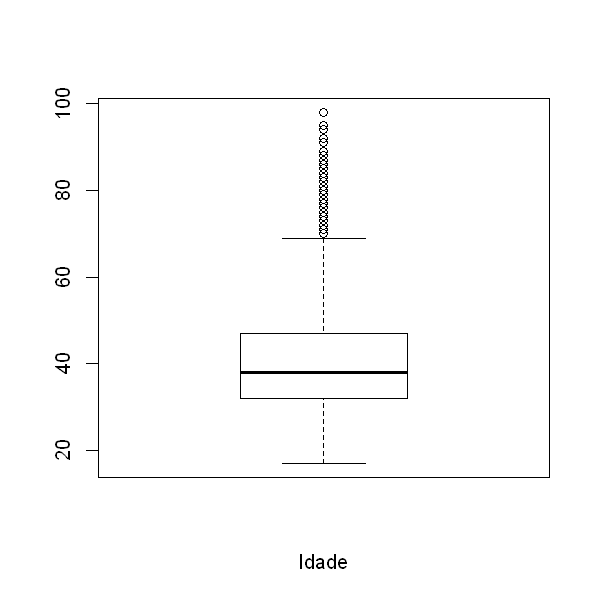

In [363]:
options(repr.plot.width = 5, repr.plot.height =5)
boxplot(train_df$age, xlab="Idade")

Algoritimos de machine learning tendem a ser viesados por outliers. Vamos separar o dataframe com e sem duration  

### 2.4) Verificar correlações.

In [493]:
options(repr.plot.width = 15, repr.plot.height =15)
repr.plot.res = 3100

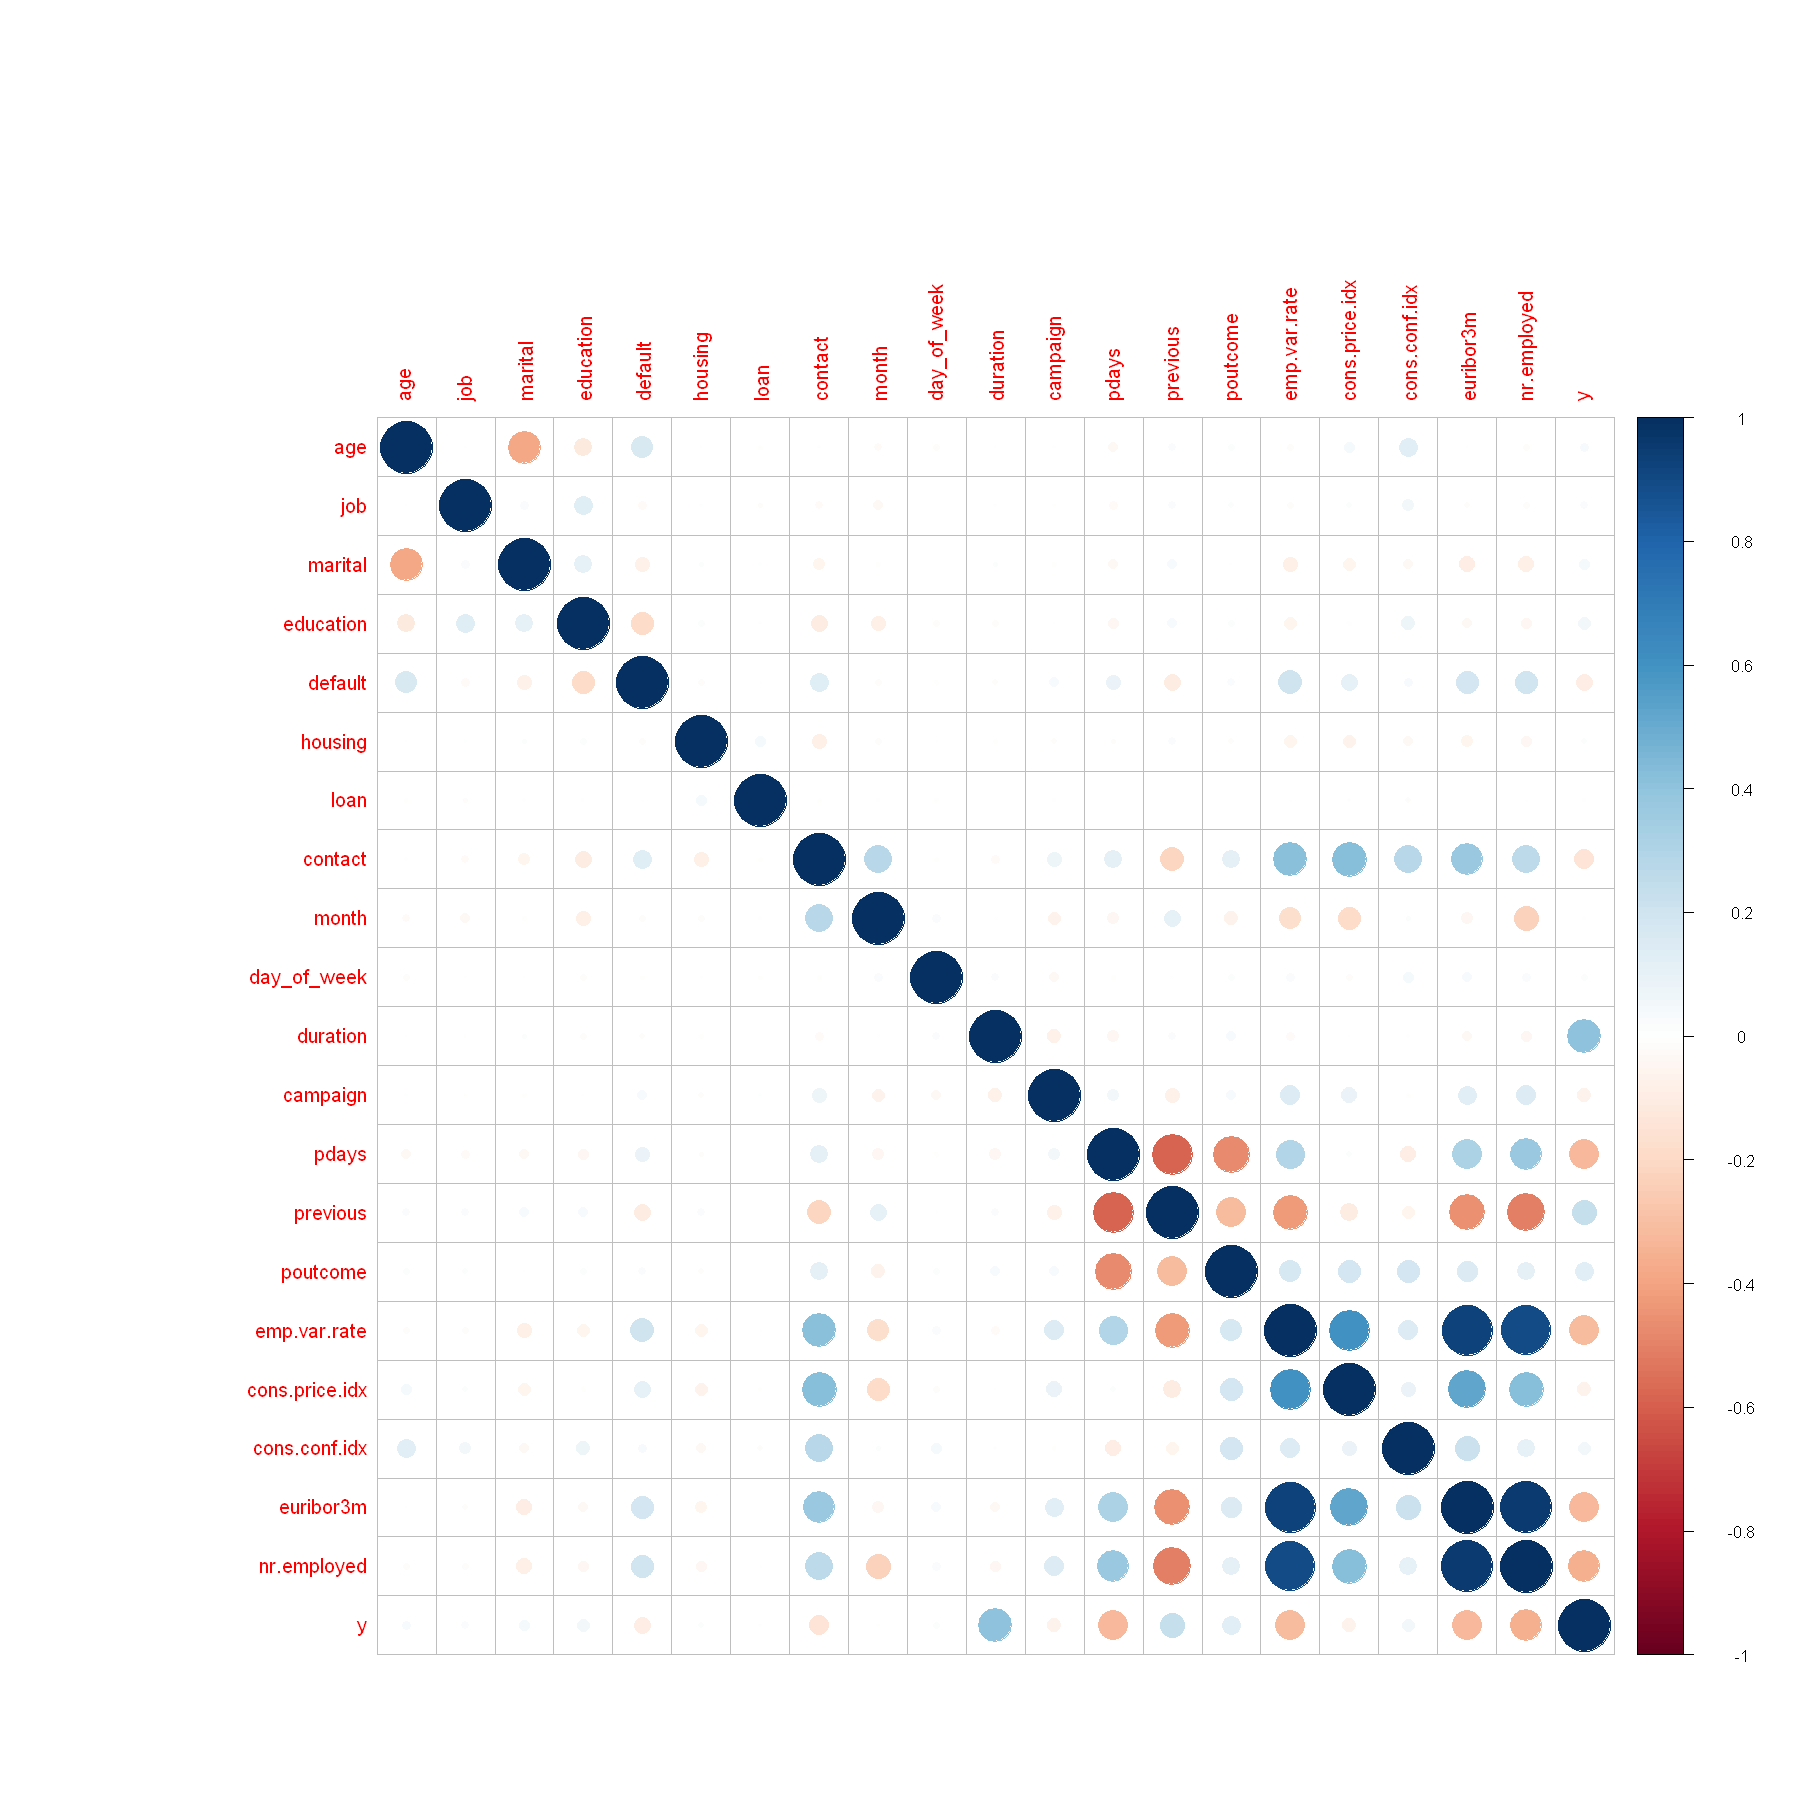

In [494]:
#correaltion matrix
#library(corrplot)
#library(psych)
bank_cor <- train_df

for(i in 1:ncol(train_df)){
  
  bank_cor[,i]<- as.integer(bank_cor[,i])
}

corrplot(cor(bank_cor,method = 'pearson'))

Verifica-se que as variáveis: 
Duration
pdays
marital
cons.conf.idx	
possuem uma correlação moderada/ baixa com a variavel y 

Acendemos um alerta para possível colinearidade das variáveis de contexto que proporemos um tratamento mais a frente



In [488]:
cor(bank_cor,method = 'pearson')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000000,0.0012495914,-0.389753255,-0.1178920140,0.164965292,-0.001603329,-0.0073681548,0.007020948,-0.024877246,-0.0175715068,...,0.0045935805,-0.0343689512,0.024364741,0.019750327,-0.016575862,0.045492424,0.127882955,0.0010208069,-0.017917462,0.030398803
job,0.001249591,1.0000000000,0.027897495,0.1341209518,-0.028277248,0.006962066,-0.0102088867,-0.025132072,-0.033213305,-0.0008441851,...,-0.0069232951,-0.0284677429,0.020964908,0.011504256,-0.015375061,0.013136468,0.050981338,-0.0127281636,-0.019665655,0.025122170
marital,-0.389753255,0.0278974953,1.000000000,0.1092195115,-0.079450057,0.010466826,0.0057881585,-0.054500920,-0.007628582,0.0022018496,...,-0.0072404930,-0.0379417279,0.038689373,0.001912068,-0.082879710,-0.058244816,-0.033370199,-0.0943835224,-0.086150569,0.046202607
education,-0.117892014,0.1341209518,0.109219511,1.0000000000,-0.186858755,0.016825478,0.0063837076,-0.105725678,-0.082683625,-0.0179863714,...,0.0003706314,-0.0466261293,0.038831313,0.017009184,-0.057170303,-0.009693804,0.073442881,-0.0381330264,-0.041797992,0.057798893
default,0.164965292,-0.0282772477,-0.079450057,-0.1868587547,1.000000000,-0.015814545,-0.0037820611,0.135237728,-0.015829785,-0.0087009210,...,0.0328245362,0.0800616841,-0.102416455,0.023417483,0.209159350,0.104001767,0.031173429,0.1876515953,0.190183623,-0.099351798
housing,-0.001603329,0.0069620661,0.010466826,0.0168254780,-0.015814545,1.000000000,0.0442958069,-0.082185681,-0.018140803,0.0033389395,...,-0.0110100056,-0.0105506834,0.021313699,-0.011782581,-0.059581279,-0.060201318,-0.037605239,-0.0528447818,-0.045964314,0.011551686
loan,-0.007368155,-0.0102088867,0.005788158,0.0063837076,-0.003782061,0.044295807,1.0000000000,-0.008556335,-0.005705236,-0.0093441852,...,0.0051655359,0.0003450298,-0.001327406,-0.001511016,0.002397115,-0.007004348,-0.012154773,0.0001671285,0.003923823,-0.004908593
contact,0.007020948,-0.0251320719,-0.054500920,-0.1057256776,0.135237728,-0.082185681,-0.0085563347,1.000000000,0.276564568,-0.0095754648,...,0.0773675370,0.1179703208,-0.212847787,0.118743611,0.413064921,0.428343049,0.271664879,0.3745294436,0.269908100,-0.144773056
month,-0.024877246,-0.0332133053,-0.007628582,-0.0826836245,-0.015829785,-0.018140803,-0.0057052364,0.276564568,1.000000000,0.0276770525,...,-0.0620588013,-0.0478910005,0.103156555,-0.065012157,-0.172841180,-0.189730693,0.010597504,-0.0496983379,-0.222280627,-0.006064778
day_of_week,-0.017571507,-0.0008441851,0.002201850,-0.0179863714,-0.008700921,0.003338940,-0.0093441852,-0.009575465,0.027677052,1.0000000000,...,-0.0382875200,-0.0095306060,-0.004102260,0.018731952,0.029031206,-0.018670491,0.041754014,0.0369657636,0.028317172,0.015967190


In [232]:
print('jobs vs Y')
cross <- xtabs(~ job+y, data = train_df)
cross

[1] "jobs vs Y"


               y
job               no  yes
  admin.        9070 1352
  blue-collar   8616  638
  entrepreneur  1332  124
  housemaid      954  106
  management    2596  328
  retired       1286  434
  self-employed 1272  149
  services      3646  323
  student        600  275
  technician    6013  730
  unemployed     870  144
  unknown        293   37

In [233]:
print('Yes / No')
round(cross[1:12,2]/cross[1:12,1] *100,2)

[1] "Yes / No"


admin.   blue-collar  entrepreneur     housemaid    management 
        14.91          7.40          9.31         11.11         12.63 
      retired self-employed      services       student    technician 
        33.75         11.71          8.86         45.83         12.14 
   unemployed       unknown 
        16.55         12.63

In [234]:
cross <- xtabs(~ education+y, data = train_df)
cross

                     y
education                no   yes
  basic.4y             3748   428
  basic.6y             2104   188
  basic.9y             5572   473
  high.school          8484  1031
  illiterate             14     4
  professional.course  4648   595
  university.degree   10498  1670
  unknown              1480   251

In [229]:
print('Yes / No')
round(cross[1:8,2]/cross[1:8,1] *100,2)

[1] "Yes / No"


basic.4y            basic.6y            basic.9y         high.school 
              11.42                8.94                8.49               12.15 
         illiterate professional.course   university.degree             unknown 
              28.57               12.80               15.91               16.96

In [36]:
cross <- xtabs(~ day_of_week+y, data = train_df)
cross

           y
day_of_week   no  yes
        fri 6981  846
        mon 7667  847
        thu 7578 1045
        tue 7137  953
        wed 7185  949

In [37]:
print('Yes / No')
round(cross[1:5,2]/cross[1:5,1] *100,2)
cross[1:5,2]+cross[1:5,1] 

[1] "Yes / No"


fri   mon   thu   tue   wed 
12.12 11.05 13.79 13.35 13.21

fri  mon  thu  tue  wed 
7827 8514 8623 8090 8134

In [235]:
options(scipen=5)
#teste de  proporção
resultado <- prop.test(x = c(846,847,1045,953,949), n =c(7827,8514,8623,8090,8134))
# Mostrando o resultado
print(resultado)



	5-sample test for equality of proportions without continuity
	correction

data:  c(846, 847, 1045, 953, 949) out of c(7827, 8514, 8623, 8090, 8134)
X-squared = 26.145, df = 4, p-value = 0.00002958
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4    prop 5 
0.1080874 0.0994832 0.1211875 0.1177998 0.1166708 



O p-valor do teste é 0.00002958, que é menor que o nível de significância alfa = 0,01. Podemos concluir que a proporção de adesão a campanha é estatisticamente diferente para os dias da semana



In [236]:
cross <- xtabs(~ campaign+y, data = train_df)
cross

        y
campaign    no   yes
      1  15342  2300
      2   9359  1211
      3   4767   574
      4   2402   249
      5   1479   120
      6    904    75
      7    591    38
      8    383    17
      9    266    17
      10   213    12
      11   165    12
      12   122     3
      13    88     4
      14    68     1
      15    49     2
      16    51     0
      17    54     4
      18    33     0
      19    26     0
      20    30     0
      21    24     0
      22    17     0
      23    15     1
      24    15     0
      25     8     0
      26     8     0
      27    11     0
      28     8     0
      29    10     0
      30     7     0
      31     7     0
      32     4     0
      33     4     0
      34     3     0
      35     5     0
      37     1     0
      39     1     0
      40     2     0
      41     1     0
      42     2     0
      43     2     0
      56     1     0

## 3) Aplicar um modelo (visto em aula ou não) para entregar uma resposta embasada à pergunta apresentada. Documentar a aplicação do modelo.

Aplicaremos o modelo Regressão Logistica para obter estimativas de propensão ao fim do processo

 Também aplicaremos  o balanceamento de Classes utilizando o método SMOTE  para gerar dados sintéticos da classe minoritária no dataset e verificar qual modelo se ajusta melhor em métricas de sensibilidade a classe positiva

### Feature Enginering 

#### Tratando Age

In [504]:
print('Valores únicos :')
length((unique(train_df$age)))
print('numero de classes Raiz(número de únicos) :')
sqrt(length((unique(train_df$age))))
print('Máximos e Mínimos')
max(train_df$age)
min(train_df$age)
classes = (max(train_df$age) -  min(train_df$age)) /sqrt(length((unique(train_df$age))))
print('intervalo entre as classes : ')
classes

age_i = summary(train_df$age,)
age_i
#print('Adotaremos um intervalo de 10 anos')

[1] "Valores únicos :"


[1] 78

[1] "numero de classes Raiz(número de únicos) :"


[1] 8.831761

[1] "Máximos e Mínimos"


[1] 98

[1] 17

[1] "intervalo entre as classes : "


[1] 9.171444

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   32.00   38.00   40.02   47.00   98.00 

In [506]:
train_df$age_bin <-  ifelse(train_df$age >= 0 & train_df$age < 17, "<17",
                            ifelse(train_df$age >= 17 & train_df$age <= 20, "17-20",
                                   ifelse(train_df$age >= 21 & train_df$age <= 30, "21-30",
                                          ifelse(train_df$age >= 21 & train_df$age <= 30, "21-30",
                                                 ifelse(train_df$age >= 31 & train_df$age <= 40, "31-40",
                                                        ifelse(train_df$age >= 41 & train_df$age <= 50, "41-50",
                                                               ifelse(train_df$age >= 51 & train_df$age <= 60, "51-60", 
                                                                      ifelse(train_df$age >= 61 & train_df$age <= 70, "61-70",
                                                                             ifelse(train_df$age >= 71 & train_df$age <= 80, "71-80", 
                                                                                    ifelse(train_df$age >= 81, "80+", 'unknown'))))))))))

In [367]:
#library(dplyr)
t <- train_df[!duplicated(train_df[,c('age','age_bin')]),]
x <-t %>% select(age,age_bin)
unique(x)

,age,age_bin
,<int>,<chr>
1,56,51-60
2,57,51-60
3,37,31-40
4,40,31-40
6,45,41-40
7,59,51-60
8,41,41-40
9,24,21-30
10,25,21-30


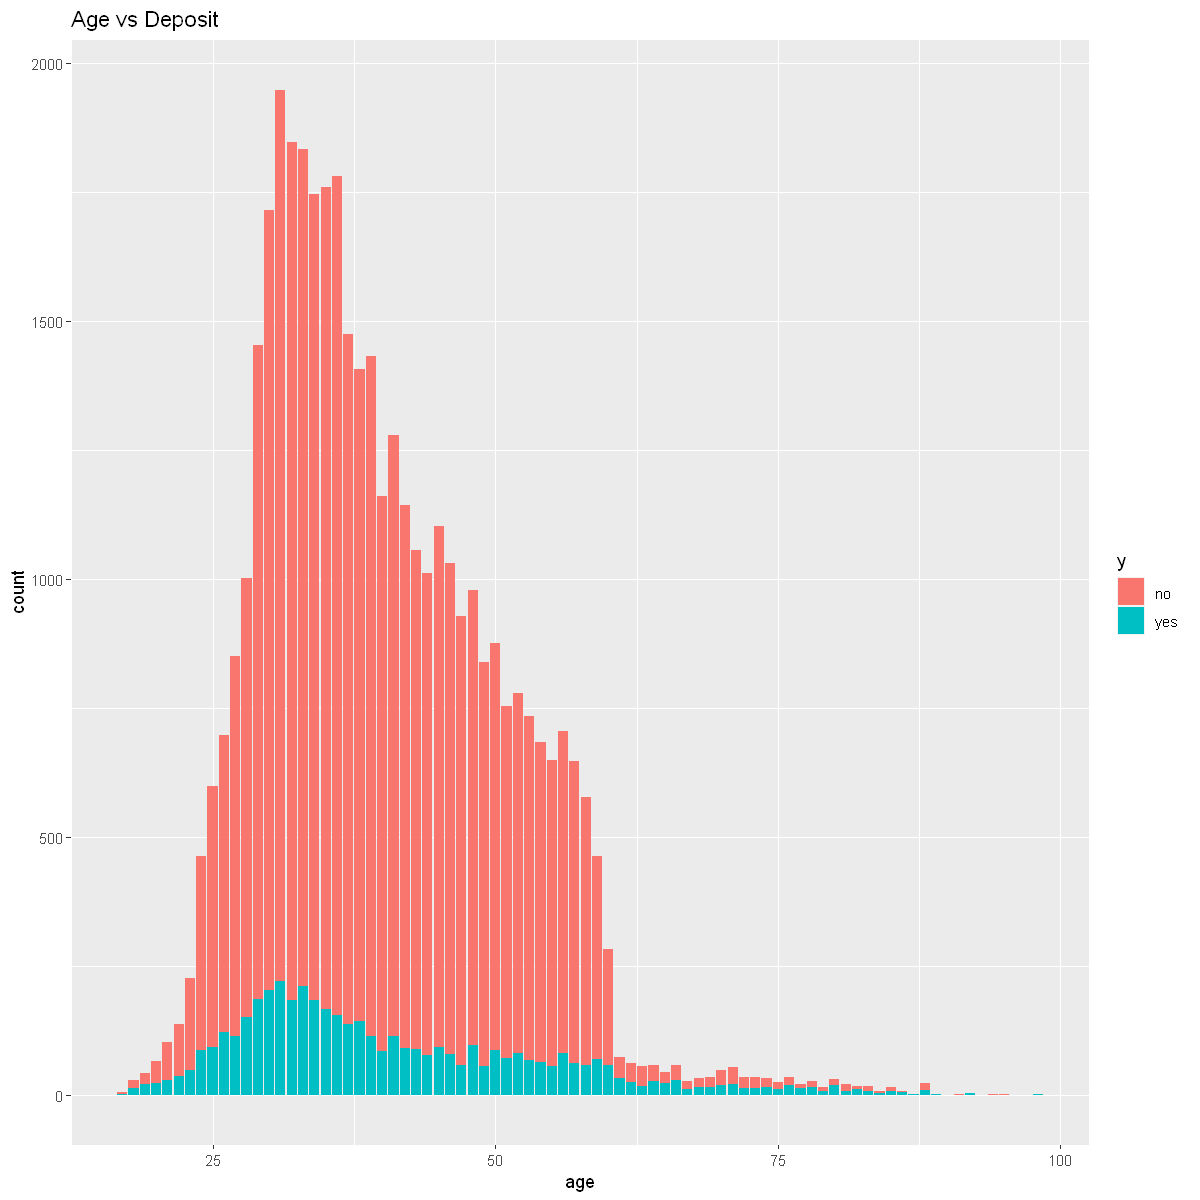

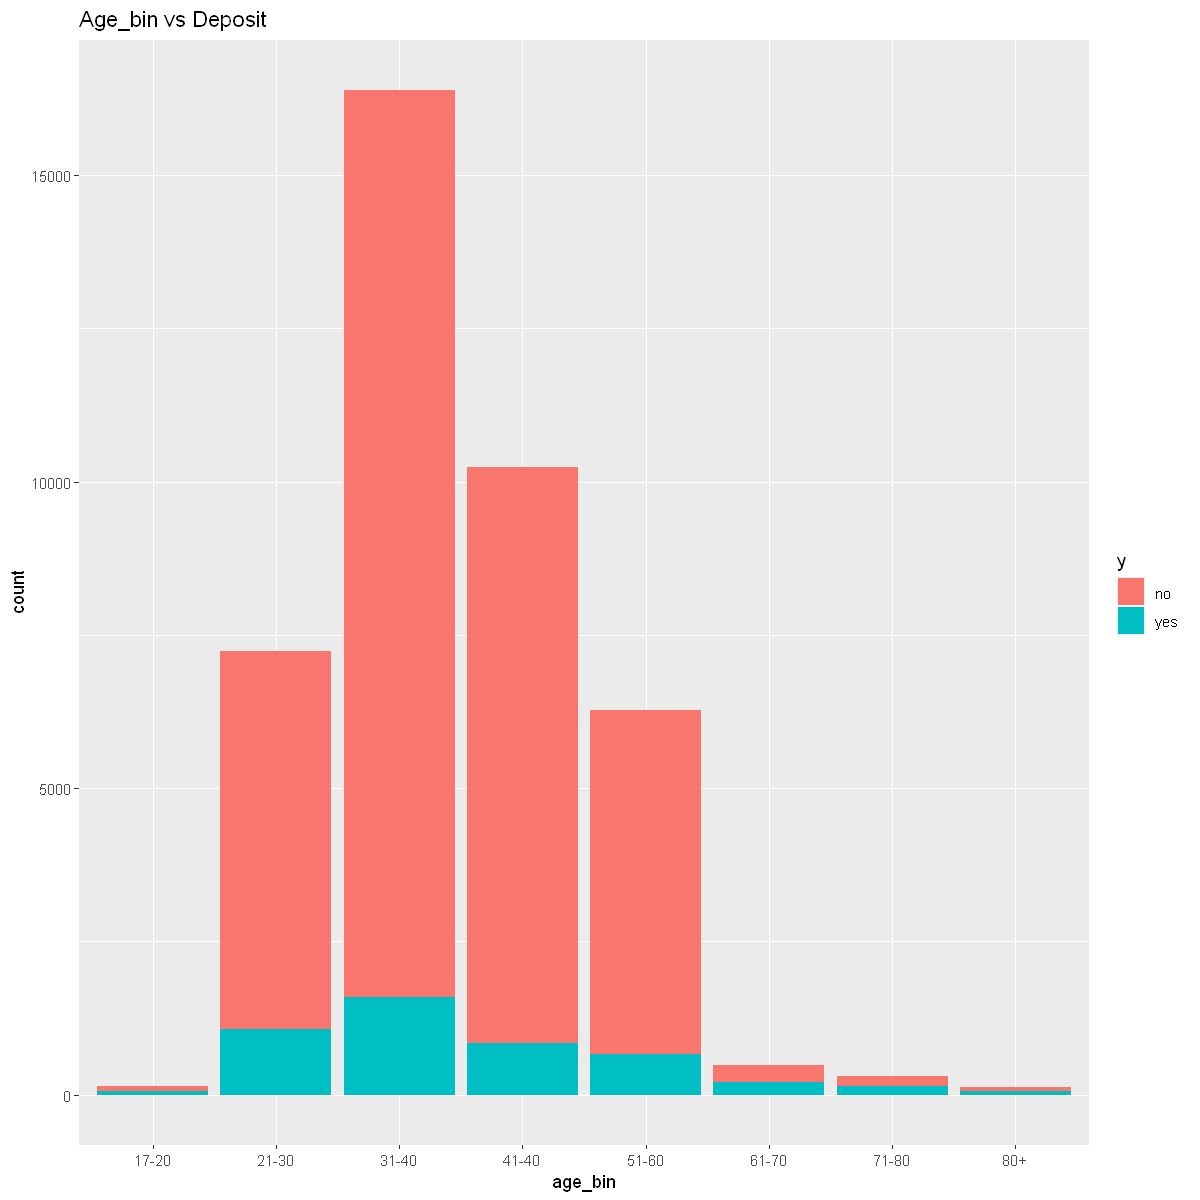

In [507]:
 options(repr.plot.width = 10, repr.plot.height =10)
ggplot(train_df,aes(age,fill=y))+geom_bar()+
  ggtitle("Age vs Deposit")->p1
p1
 
ggplot(train_df,aes(age_bin,fill=y))+geom_bar()+
  ggtitle("Age_bin vs Deposit")->p2
p2

#### Trantando o Campaign

In [369]:
cross <- xtabs(~ campaign+y, data = train_df)
cross

        y
campaign    no   yes
      1  15342  2300
      2   9359  1211
      3   4767   574
      4   2402   249
      5   1479   120
      6    904    75
      7    591    38
      8    383    17
      9    266    17
      10   213    12
      11   165    12
      12   122     3
      13    88     4
      14    68     1
      15    49     2
      16    51     0
      17    54     4
      18    33     0
      19    26     0
      20    30     0
      21    24     0
      22    17     0
      23    15     1
      24    15     0
      25     8     0
      26     8     0
      27    11     0
      28     8     0
      29    10     0
      30     7     0
      31     7     0
      32     4     0
      33     4     0
      34     3     0
      35     5     0
      37     1     0
      39     1     0
      40     2     0
      41     1     0
      42     2     0
      43     2     0
      56     1     0

In [370]:
conversao =round(cross[1:42,2]/cross[1:42,1] *100,2)
print(conversao)

    1     2     3     4     5     6     7     8     9    10    11    12    13 
14.99 12.94 12.04 10.37  8.11  8.30  6.43  4.44  6.39  5.63  7.27  2.46  4.55 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 1.47  4.08  0.00  7.41  0.00  0.00  0.00  0.00  0.00  6.67  0.00  0.00  0.00 
   27    28    29    30    31    32    33    34    35    37    39    40    41 
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 
   42    43    56 
 0.00  0.00  0.00 


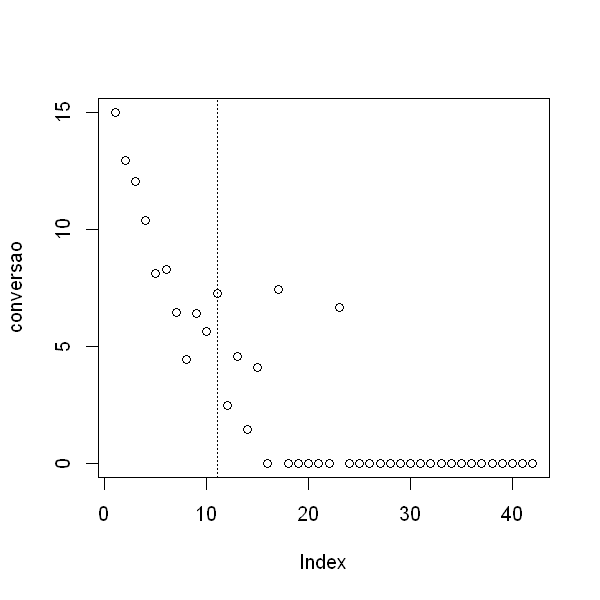

In [371]:
plot(conversao)
abline(v = 11, 
       lty = 3)

Com base na inspeção visual, julgamos factível cortar os dados de 11 para cima como um único factor, de modo a reduzir a variancia da variável

In [372]:
train_df$campaign_bin <-  ifelse(train_df$campaign >= 1 & train_df$campaign <=11 , train_df$campaign, '11+')


In [373]:
t <- train_df[!duplicated(train_df[,c('campaign','campaign_bin')]),]
t <- t %>% select(campaign,campaign_bin)
unique(t)

,campaign,campaign_bin
,<int>,<chr>
1,1,1
29,2,2
102,3,3
279,4,4
333,5,5
695,6,6
888,7,7
1044,8,8
1468,9,9


#### Tratando pdays

Variável era numérica, entretanto, possuia um 999 que atrapalhava a escala. Trataremos para trabalhar com fator nessa variável

In [374]:
train_df$pdays_bin <-  ifelse(train_df$pdays != '999',train_df$pdays, 'NA')

In [375]:
f<- train_df %>% select(pdays,pdays_bin)
unique(f)

,pdays,pdays_bin
,<int>,<chr>
1,999,NA
24109,6,6
24265,4,4
24398,3,3
24614,5,5
24851,1,1
25498,0,0
27765,10,10
27769,7,7


##### Tratando previous

In [376]:
train_df$previous_bin <- factor(train_df$previous)

In [377]:
x <- train_df %>% select(previous,previous_bin) 
unique(x)

,previous,previous_bin
,<int>,<fct>
1,0,0
24014,1,1
25997,2,2
28022,3,3
36461,4,4
39592,5,5
40396,6,6
41082,7,7


#### Trabalhando as Variáveis de Contexto

Adotaremos a abordagem de redução de dimensionalidade por meio do PCA para evitar a colinearidade das variaveis altamente correlacionadas 

In [378]:
train_social <- train_df %>% select(y,nr.employed,euribor3m,cons.price.idx,cons.conf.idx,emp.var.rate)
for(i in 1:ncol(train_social)){
  
  train_social[,i]<- as.numeric(train_social[,i])
}

test_social <- test_df %>% select(nr.employed,euribor3m,cons.price.idx,cons.conf.idx,emp.var.rate)
for(i in 1:ncol(test_social)){
  
  test_social[,i]<- as.numeric(test_social[,i])
}


In [379]:
describe(train_social)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
y,1,41188,1.1126542,0.3161734,1.000,1.0158412,0.0000000,1.000,2.000,1.000,2.4501517,4.003340390,0.001557902
nr.employed,2,41188,5167.0359109,72.2515277,5191.000,5178.4253338,55.0044600,4963.600,5228.100,264.500,-1.0441863,-0.004051071,0.356009578
euribor3m,3,41188,3.6212908,1.7344474,4.857,3.8055852,0.1601208,0.634,5.045,4.411,-0.7091363,-1.406854882,0.008546254
cons.price.idx,4,41188,93.5756644,0.5788400,93.749,93.5807666,0.5633880,92.201,94.767,2.566,-0.2308708,-0.829958893,0.002852156
cons.conf.idx,5,41188,-40.5026003,4.6281979,-41.800,-40.6015356,6.5234400,-50.800,-26.900,23.900,0.3031578,-0.358788711,0.022804816
emp.var.rate,6,41188,0.0818855,1.5709597,1.100,0.2661204,0.4447800,-3.400,1.400,4.800,-0.7240428,-1.062742274,0.007740691


In [380]:
cor(train_social, method = 'pearson')

,y,nr.employed,euribor3m,cons.price.idx,cons.conf.idx,emp.var.rate
y,1.00000000,-0.3546783,-0.3077714,-0.13621121,0.05487795,-0.2983344
nr.employed,-0.35467830,1.0000000,0.9451544,0.52203398,0.10051343,0.9069701
euribor3m,-0.30777140,0.9451544,1.0000000,0.68823011,0.27768622,0.9722447
cons.price.idx,-0.13621121,0.5220340,0.6882301,1.00000000,0.05898618,0.7753342
cons.conf.idx,0.05487795,0.1005134,0.2776862,0.05898618,1.00000000,0.1960413
emp.var.rate,-0.29833443,0.9069701,0.9722447,0.77533417,0.19604127,1.0000000


Pouca correlação entre as séries e a variável target e fortíssima correlação entre euribor3m e nr.employed e emp var rate. 

In [381]:
#dropando o Y
train_social <- train_social[2:6]
str(train_social)

'data.frame':	41188 obs. of  5 variables:
 $ nr.employed   : num  5191 5191 5191 5191 5191 ...
 $ euribor3m     : num  4.86 4.86 4.86 4.86 4.86 ...
 $ cons.price.idx: num  94 94 94 94 94 ...
 $ cons.conf.idx : num  -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 ...
 $ emp.var.rate  : num  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...


#### verificando quantidade de componentes necessária

In [382]:
social.pca <- prcomp(scale(train_social),center = TRUE)
summary(social.pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5
Standard deviation     1.8631 0.9914 0.7143 0.15865 0.10346
Proportion of Variance 0.6942 0.1966 0.1021 0.00503 0.00214
Cumulative Proportion  0.6942 0.8908 0.9928 0.99786 1.00000

Três componentes são capazes de explicar 99% da variancia do contexto

[1] "proportions of variance:"
[1] 0.694211134 0.196558308 0.102055396 0.005034281 0.002140881


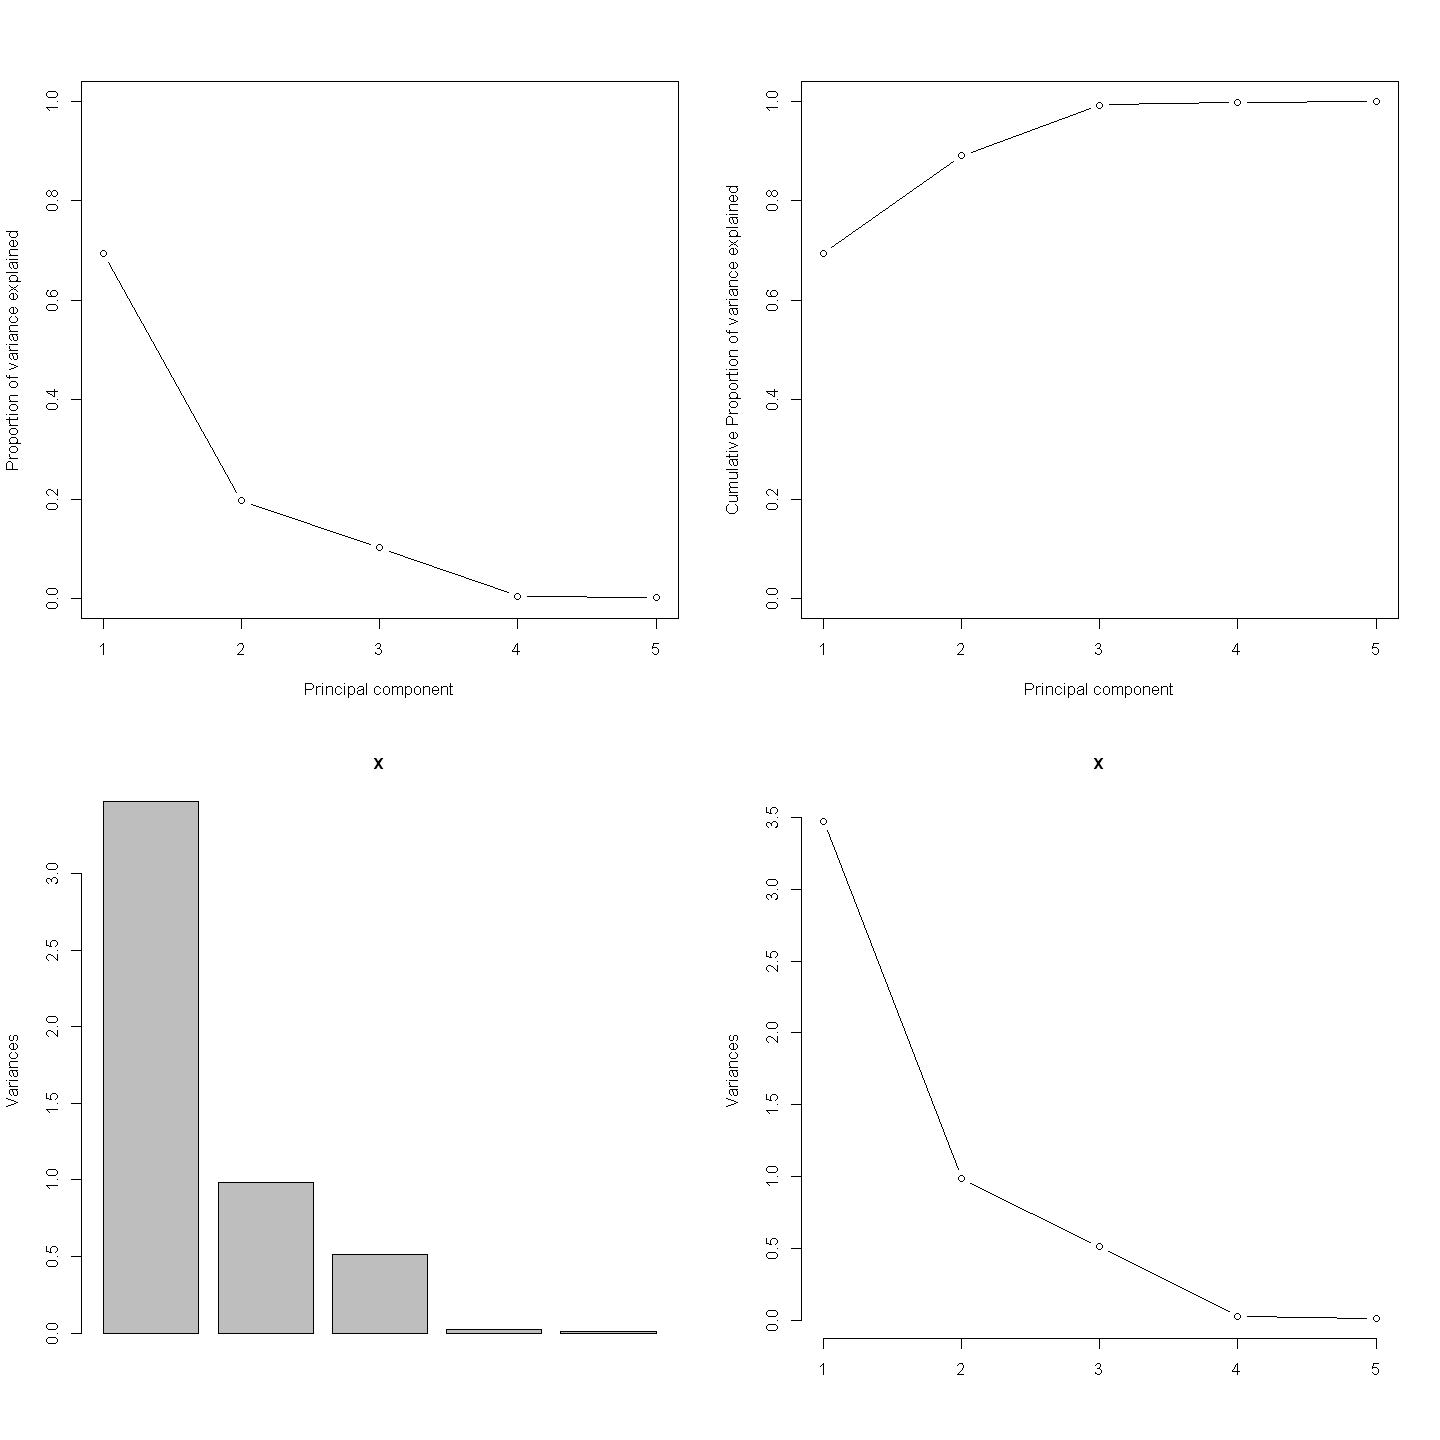

In [385]:
options(repr.plot.width = 12, repr.plot.height =12)
pcaCharts <- function(x) {
    x.var <- x$sdev ^ 2
    x.pvar <- x.var/sum(x.var)
    print("proportions of variance:")
    print(x.pvar)
    
    par(mfrow=c(2,2))
    plot(x.pvar,xlab="Principal component", ylab="Proportion of variance explained", ylim=c(0,1), type='b')
    plot(cumsum(x.pvar),xlab="Principal component", ylab="Cumulative Proportion of variance explained", ylim=c(0,1), type='b')
    screeplot(x)
    screeplot(x,type="l")
    par(mfrow=c(1,1))
}

pcaCharts(social.pca)

### Normalizando as Variáveis

In [386]:
#treinando o scaler e identificando PCAs
pca = preProcess(x = train_social, method = 'pca', pcaComp = 3) #SCALER
 

Modelo para scaler treinado  pode ser aplicado no dataset de teste sem "vazar" os dados para o treino

In [387]:
pca

Created from 41188 samples and 5 variables

Pre-processing:
  - centered (5)
  - ignored (0)
  - principal component signal extraction (5)
  - scaled (5)

PCA used 3 components as specified

### Aplicando o PCA

In [388]:
train_social = predict(pca, train_social)
# aplicando o PCA treinado no test

test_social <-  predict(pca, test_social)
 

In [389]:
head(train_social)

,PC1,PC2,PC3
,<dbl>,<dbl>,<dbl>
1,-1.306296,0.6966986,-0.3858233
2,-1.306296,0.6966986,-0.3858233
3,-1.306296,0.6966986,-0.3858233
4,-1.306296,0.6966986,-0.3858233
5,-1.306296,0.6966986,-0.3858233
6,-1.306296,0.6966986,-0.3858233


### Resolvendo os desbalanceamento de classes

No SMOTE (Synthetic Minority Oversampling Technique), dados sintéticos são criados para a classe minoria na vizinhança dos elementos existentes

Será aplicado após o PCA conforme a literatura  de referência
https://arxiv.org/ftp/arxiv/papers/1403/1403.1949.pdf


   no   yes 
36548  4640 

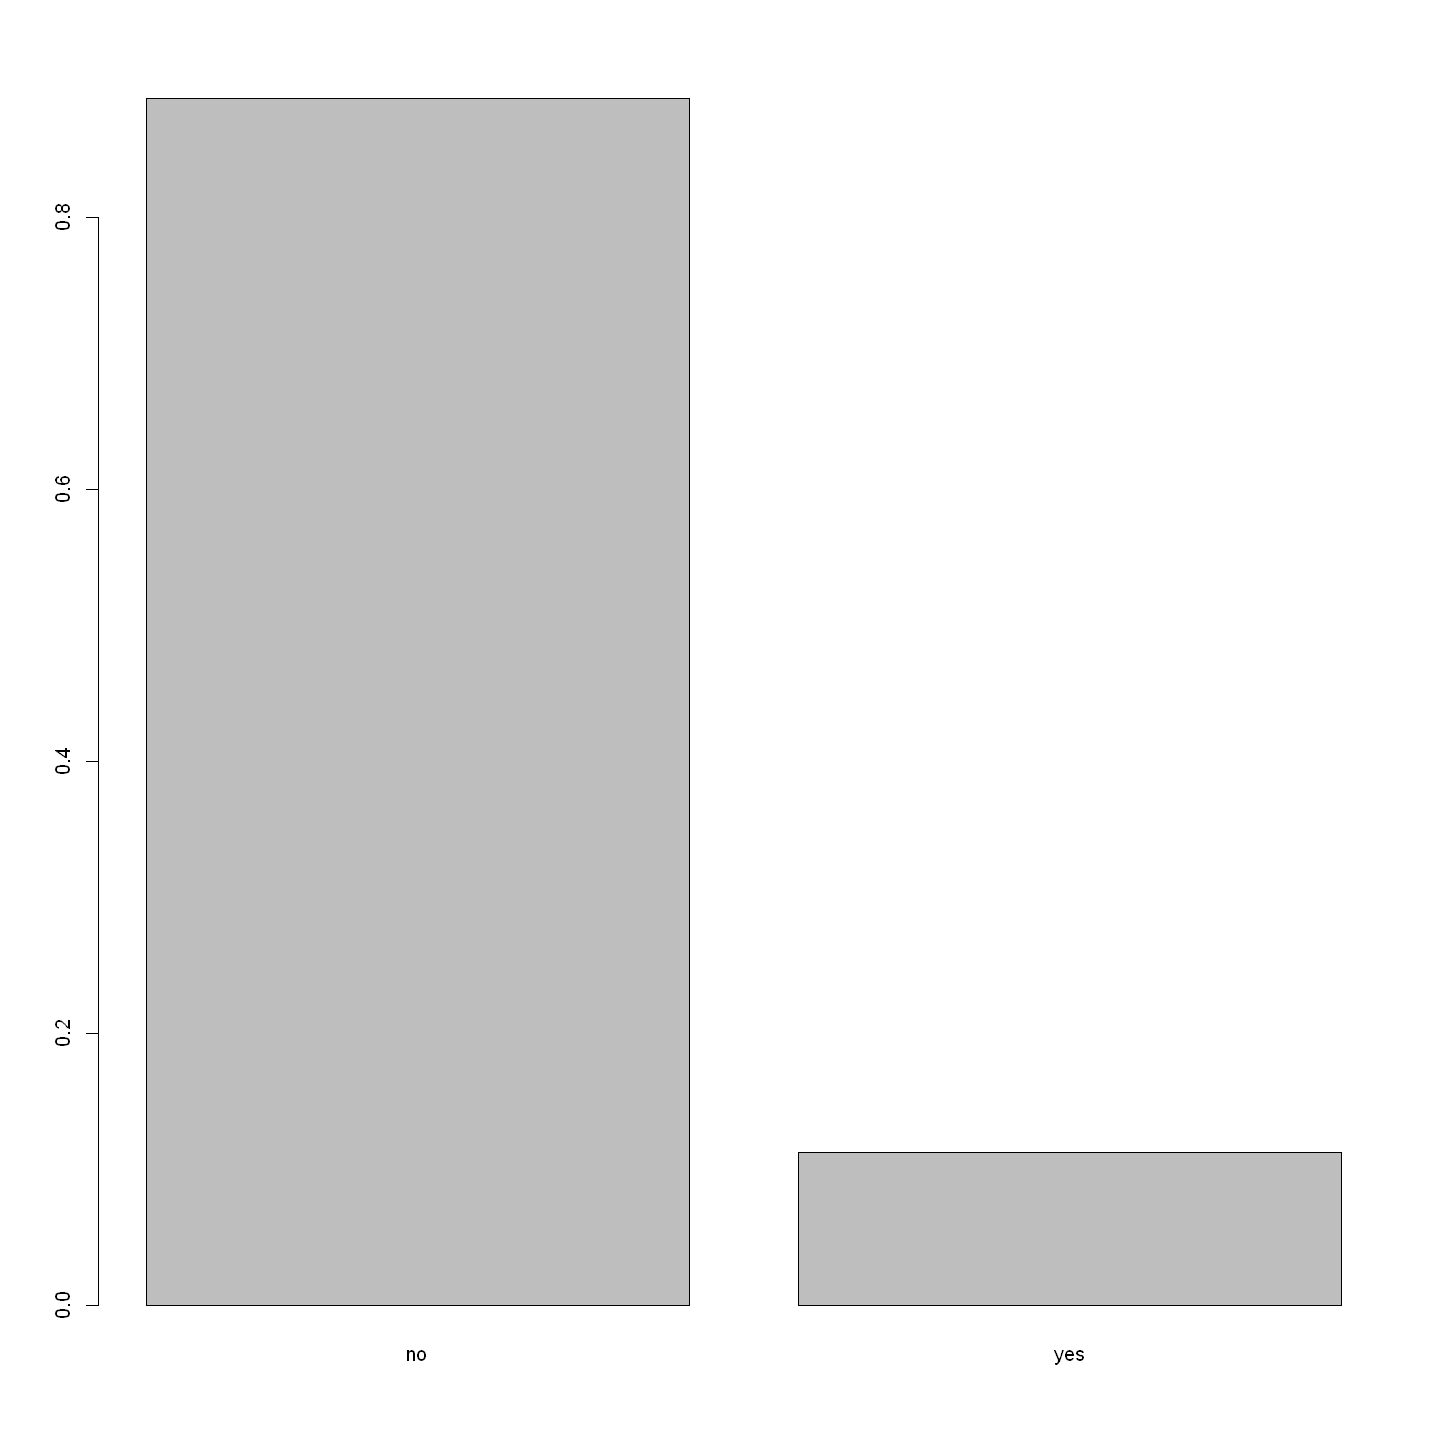

In [390]:
#checando a tabela
table(train_df$y)
 
#check classes distribution
barplot(prop.table(table(train_df$y)))

#### Dataset com variáveis PCA - train_df_pca

In [391]:
train_df$campaign_bin   <-factor(train_df$campaign_bin  )
train_df$pdays_bin      <-factor(train_df$pdays_bin     )
train_df$age_bin <-factor(train_df$age_bin)
str(train_df)



'data.frame':	41188 obs. of  25 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

In [392]:
#removendo as colunas que foram tratadas
g <-  subset(train_df, select = -c(age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed))
g$pca1 <-train_social$PC1
g$pca2 <-train_social$PC2
g$pca3 <-train_social$PC3


   no   yes 
20861 20327 

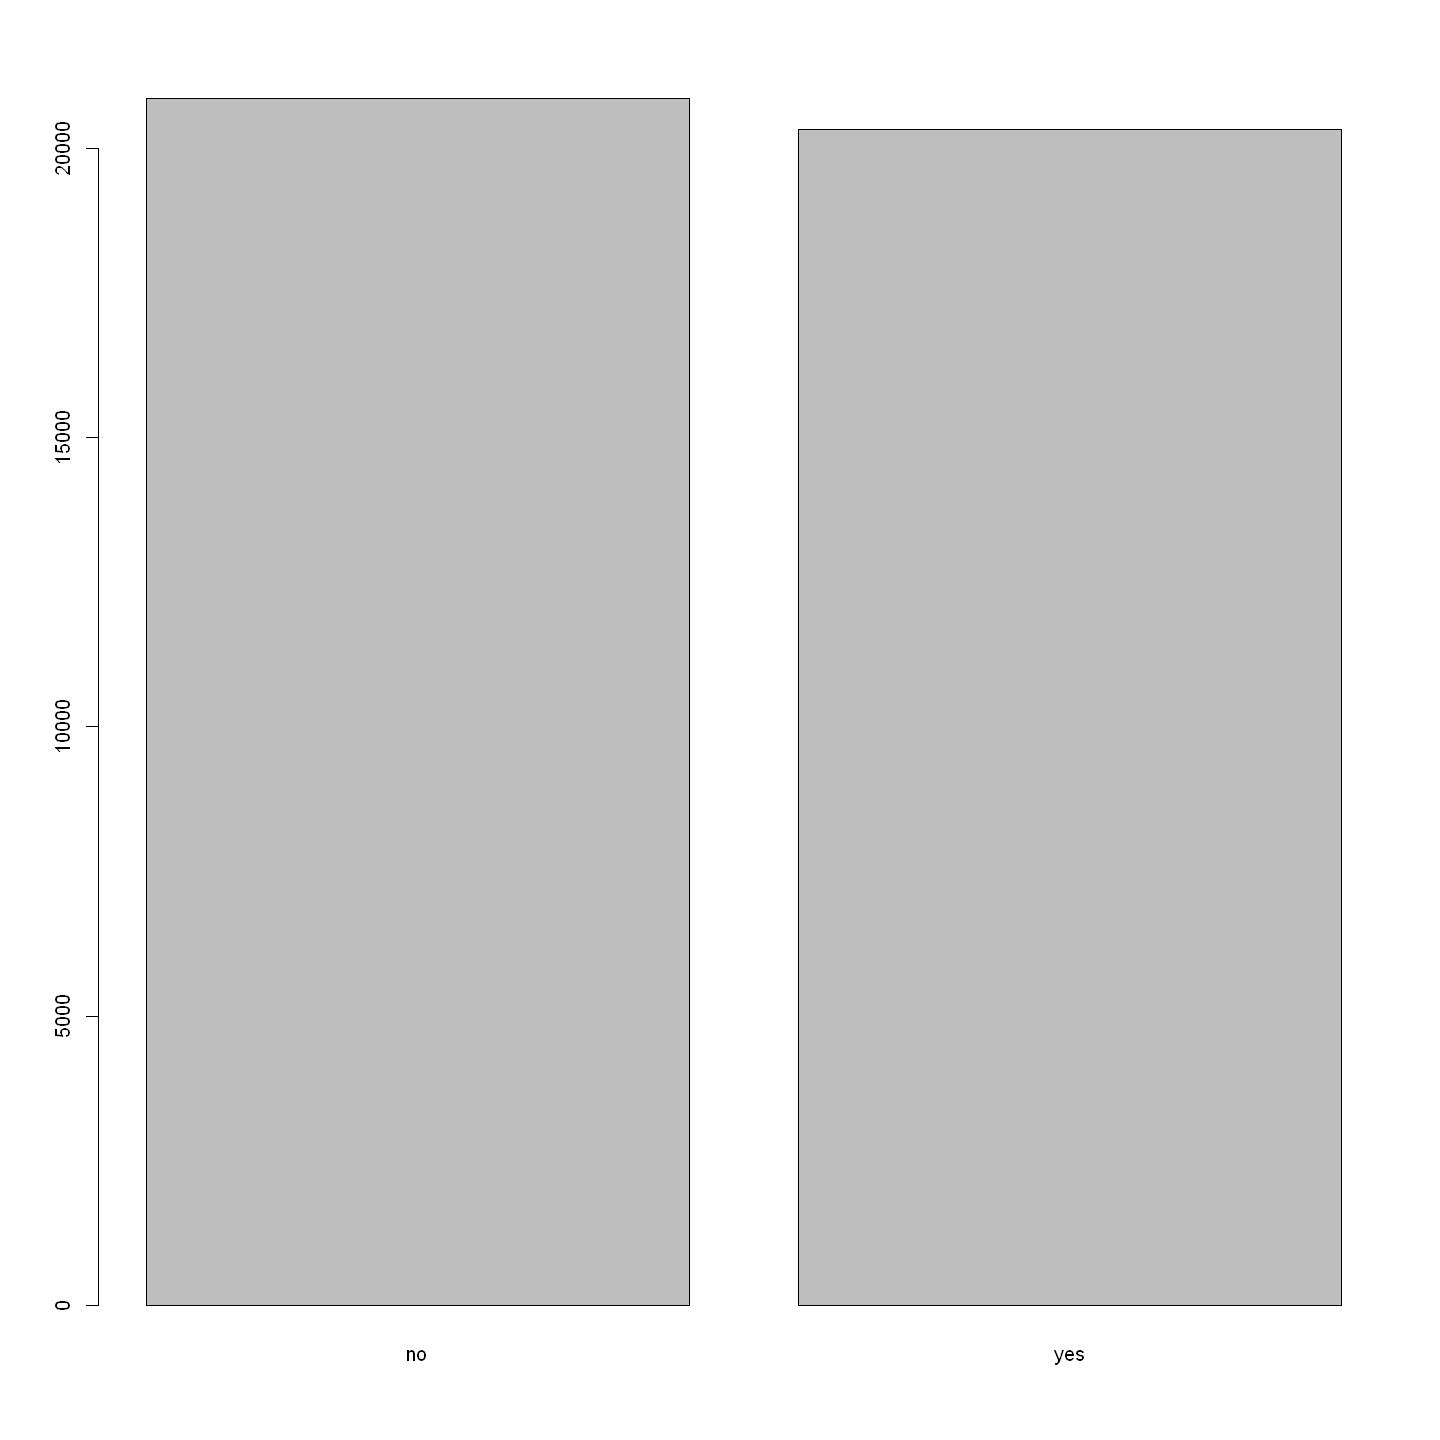

In [393]:

train_df_pca <- ROSE(y ~ ., data = g, ,seed = 123, N = nrow(train_df))$data

table(train_df_pca$y)
barplot(table(train_df_pca$y))

In [394]:
summary(train_df_pca)
summary(train_df)

          job            marital                    education    
 admin.     :11204   divorced: 4452   university.degree  :13278  
 blue-collar: 7725   married :23880   high.school        : 9455  
 technician : 6581   single  :12780   basic.9y           : 5271  
 services   : 3545   unknown :   76   professional.course: 5225  
 management : 2835                    basic.4y           : 3926  
 retired    : 2620                    basic.6y           : 2027  
 (Other)    : 6678                    (Other)            : 2006  
    default         housing           loan            contact     
 no     :34666   no     :18226   no     :33917   cellular :29638  
 unknown: 6520   unknown:  994   unknown:  994   telephone:11550  
 yes    :    2   yes    :21968   yes    : 6277                    
                                                                  
                                                                  
                                                                  
   

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

#### Dataset com variáveis não PCA train_df_npca

In [395]:
 
n <-  subset(train_df, select = -c(age ,campaign ,pdays ,previous ))



In [396]:

train_df_npca <-  ROSE(y ~ ., data = n, ,seed = 123, N = nrow(train_df))$data
table( train_df_npca$y)


   no   yes 
20861 20327 

#### Dataframe sem intervensões 


In [397]:
w <- read.csv2("bank-additional-full.csv",sep = ';', dec= '.')
 


original_treino <-  ROSE(y ~ ., data = w ,seed = 123, N = nrow(train_df))$data
table( original$y)


   no   yes 
41517 40859 

### Dataframe Tratado para Rodar os Modelos

Variáveis desconsideradas 

- Duration: O arquivo de descrição do Dataset indica que essa variável precisa ser removida para um estimador robusto
- default: Variável apesar de binária não tem informações na classe Yes (apenas 3 registros)

 


Variáveis tratadas
- age: Transformamos em classes com intervalos de 9 anos
- campaign: transformamos em classes com intervalos e agrupamos os dias 11+ em um único categorico.
- pdays: transformamos o tipo para categorico e tratamos o 999 para NA.
- previous: Tratado para string


Variáveis substituídas / geradas 
- nr.employed	
- euribor3m	
- cons.price.idx	
- cons.conf.idx	
- emp.var.rate


- PCA1,PCA2,PCA3 : PCA analysis juntando as variáveis economicas em uma única, pois são muito correlacionadas.


 

Temos Três datasets treino e verificaremos a performance dos modelos treinados nesses tres conjuntos antes de responder a pergunta usando o mais adequado.

- 1) Variaveis normalizadas + PCA  [train_df_pca]
- 2) Variáveis normalizadas sem PCA   [train_df_npca]
- 3) Variáveis não normalizadas sem PCA  [original_treino]


Por consequencia da abordagem nossos conjuntos de teste também terão tres versões.

obs: o modelo de pca e escaler são treinados apenas no conjunto treino, evitando o vazamento de dados do conjunto teste para o treino. 

- 1) Variaveis normalizadas + PCA   [test_df_pca]
- 2) Variáveis normalizadas sem PCA   [test_df_npca]
- 3) Variáveis não normalizadas sem PCA  [original_test]


### Dataframes - Treino/Teste Variaveis normalizadas + PCA  

In [398]:
names(train_df_pca)

[1] "job"          "marital"      "education"    "default"      "housing"     
 [6] "loan"         "contact"      "month"        "day_of_week"  "duration"    
[11] "poutcome"     "y"            "age_bin"      "campaign_bin" "pdays_bin"   
[16] "previous_bin" "pca1"         "pca2"         "pca3"

In [399]:
#Variáveis desconsideradas 
train_df_pca <-  subset(train_df_pca, select = -c(duration,default))
test_df_pca <-  subset(test_df, select = -c(duration,default))

#Variáveis tratadas
test_df_pca$age_bin <-  ifelse(test_df_pca$age >= 0 & test_df_pca$age < 17, "<17",
                            ifelse(test_df_pca$age >= 17 & test_df_pca$age <= 20, "17-20",
                                   ifelse(test_df_pca$age >= 21 & test_df_pca$age <= 30, "21-30",
                                          ifelse(test_df_pca$age >= 21 & test_df_pca$age <= 30, "21-30",
                                                 ifelse(test_df_pca$age >= 31 & test_df_pca$age <= 40, "31-40",
                                                        ifelse(test_df_pca$age >= 41 & test_df_pca$age <= 50, "41-50",
                                                               ifelse(test_df_pca$age >= 51 & test_df_pca$age <= 60, "51-60", 
                                                                      ifelse(test_df_pca$age >= 61 & test_df_pca$age <= 70, "61-70",
                                                                             ifelse(test_df_pca$age >= 71 & test_df_pca$age <= 80, "71-80", 
                                                                                    ifelse(test_df_pca$age >= 81, "80+", 'unknown'))))))))))



test_df_pca$age_bin <-factor(test_df_pca$age_bin)

test_df_pca$campaign_bin <-  ifelse(test_df_pca$campaign >= 1 & test_df_pca$campaign <=11 , test_df_pca$campaign, '11+')
test_df_pca$campaign_bin <-factor(test_df_pca$campaign_bin)

test_df_pca$pdays_bin <-  ifelse(test_df_pca$pdays != '999',test_df_pca$pdays, 'NA')
test_df_pca$pdays_bin <-factor(test_df_pca$pdays_bin)
test_df_pca$previous_bin <- factor(test_df_pca$previous)


#tratadas as colunas, podemos dropar as originais

#tratadas as colunas, podemos dropar as originais
test_df_pca <-  subset(test_df_pca, select = -c(age,campaign,pdays,previous))


 
#Variáveis substituídas / geradas

test_df_pca$pca1 <-test_social$PC1
test_df_pca$pca2 <-test_social$PC2
test_df_pca$pca3 <-test_social$PC3

#removendo as variáveis substituidas
test_df_pca <-  subset(test_df_pca, select = -c(nr.employed,euribor3m,cons.price.idx,cons.conf.idx,emp.var.rate))


print('DF Teste')
str(test_df_pca)
print('DF Treino') 
str(train_df_pca)
 
    
 

[1] "DF Teste"
'data.frame':	4119 obs. of  17 variables:
 $ job         : Factor w/ 12 levels "admin.","blue-collar",..: 2 8 8 8 1 8 1 3 8 2 ...
 $ marital     : Factor w/ 4 levels "divorced","married",..: 2 3 2 2 2 3 3 2 1 2 ...
 $ education   : Factor w/ 8 levels "basic.4y","basic.6y",..: 3 4 4 3 7 7 7 7 6 3 ...
 $ housing     : Factor w/ 3 levels "no","unknown",..: 3 1 3 2 3 1 3 3 1 1 ...
 $ loan        : Factor w/ 3 levels "no","unknown",..: 1 1 1 2 1 1 1 1 1 1 ...
 $ contact     : Factor w/ 2 levels "cellular","telephone": 1 2 2 2 1 1 1 1 1 2 ...
 $ month       : Factor w/ 10 levels "apr","aug","dec",..: 7 7 5 5 8 10 10 8 8 7 ...
 $ day_of_week : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 1 2 3 2 2 4 3 ...
 $ poutcome    : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 1 2 2 1 2 ...
 $ y           : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ age_bin     : Factor w/ 8 levels "17-20","21-30",..: 2 3 2 3 4 3 3 4 3 3 ...
 $ campaign_bin: Factor w/ 12 level

### Dataframes - Treino/Teste Variaveis normalizadas s/ PCA  


In [400]:
names(train_df_npca)
names(test_df)

[1] "job"            "marital"        "education"      "default"       
 [5] "housing"        "loan"           "contact"        "month"         
 [9] "day_of_week"    "duration"       "poutcome"       "emp.var.rate"  
[13] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[17] "y"              "age_bin"        "campaign_bin"   "pdays_bin"     
[21] "previous_bin"

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [401]:
#Variáveis tratadas
test_df_npca <- test_df


#Variáveis desconsideradas 
train_df_npca <-  subset(train_df_npca, select = -c(duration,default))
test_df_npca <-  subset(test_df_npca, select = -c(duration,default))



test_df_npca$age_bin <-  ifelse(test_df$age >= 0 & test_df$age < 17, "<17",
                            ifelse(test_df$age >= 17 & test_df$age <= 20, "17-20",
                                   ifelse(test_df$age >= 21 & test_df$age <= 30, "21-30",
                                          ifelse(test_df$age >= 21 & test_df$age <= 30, "21-30",
                                                 ifelse(test_df$age >= 31 & test_df$age <= 40, "31-40",
                                                        ifelse(test_df$age >= 41 & test_df$age <= 50, "41-40",
                                                               ifelse(test_df$age >= 51 & test_df$age <= 60, "51-60", 
                                                                      ifelse(test_df$age >= 61 & test_df$age <= 70, "61-70",
                                                                             ifelse(test_df$age >= 71 & test_df$age <= 80, "71-80", 
                                                                                    ifelse(test_df$age >= 81, "80+", 'unknown'))))))))))



test_df_npca$age_bin <-factor(test_df_npca$age_bin)

test_df_npca$campaign_bin <-  ifelse(test_df_npca$campaign >= 1 & test_df_npca$campaign <=11 , test_df_npca$campaign, '11+')
test_df_npca$campaign_bin <-factor(test_df_npca$campaign_bin)

test_df_npca$pdays_bin <-  ifelse(test_df_npca$pdays != '999',test_df_npca$pdays, 'NA')
test_df_npca$pdays_bin <-factor(test_df_npca$pdays_bin)
test_df_npca$previous_bin <- factor(test_df_npca$previous)


 

#tratadas as colunas, podemos dropar as originais
test_df_npca <-  subset(test_df_npca, select = -c(age,campaign,pdays,previous))


 

 print('DF Teste')
str(test_df_npca)
print('DF Treino') 
str(train_df_npca)

 

 

[1] "DF Teste"
'data.frame':	4119 obs. of  19 variables:
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 2 8 8 8 1 8 1 3 8 2 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 3 2 2 2 3 3 2 1 2 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 3 4 4 3 7 7 7 7 6 3 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 3 1 3 2 3 1 3 3 1 1 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 2 1 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 1 2 2 2 1 1 1 1 1 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 5 5 8 10 10 8 8 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 1 1 5 1 2 3 2 2 4 3 ...
 $ poutcome      : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 1 2 2 1 2 ...
 $ emp.var.rate  : num  -1.8 1.1 1.4 1.4 -0.1 -1.1 -1.1 -0.1 -0.1 1.1 ...
 $ cons.price.idx: num  92.9 94 94.5 94.5 93.2 ...
 $ cons.conf.idx : num  -46.2 -36.4 -41.8 -4

### Dataframes - Original treino/teste

In [402]:
original_teste=read.csv2("bank-additional.csv",sep = ';',dec= '.')
original_teste <-subset(original_teste, select =  -c(duration,default))

#Variáveis desconsideradas 
original_treino <-  subset(original_treino, select = -c(duration,default))

In [403]:
names(original_teste)

[1] "age"            "job"            "marital"        "education"     
 [5] "housing"        "loan"           "contact"        "month"         
 [9] "day_of_week"    "campaign"       "pdays"          "previous"      
[13] "poutcome"       "emp.var.rate"   "cons.price.idx" "cons.conf.idx" 
[17] "euribor3m"      "nr.employed"    "y"

In [404]:
names(original_treino)

[1] "age"            "job"            "marital"        "education"     
 [5] "housing"        "loan"           "contact"        "month"         
 [9] "day_of_week"    "campaign"       "pdays"          "previous"      
[13] "poutcome"       "emp.var.rate"   "cons.price.idx" "cons.conf.idx" 
[17] "euribor3m"      "nr.employed"    "y"

### Instanciando Modelo Regressão Logistica

In [405]:
#suprimindo warnning
#oldw <- getOption("warn")
#options(warn = -1)

#biblioteca para cross validation
#library(caret)
#library(e1071)

#semente aleatoria
set.seed(123) 
# Define training control
ctrl <- trainControl(method = "cv", number = 5, classProbs = TRUE)


# modelo com PCA
log_fit_pca <- train(y ~., data = train_df_pca,
                 method = "glm",
                 trControl = ctrl)


# modelo sem PCA
log_fit_npca <- train(y ~., data = train_df_npca,
                 method = "glm",
                 trControl = ctrl)

# modelo no original
log_fit_orig <- train(y ~., data = original_treino,
                 method = "glm",
                 trControl = ctrl)


print(log_fit_pca)
print(log_fit_npca)
print(log_fit_orig) 

Generalized Linear Model 

41188 samples
   16 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 32951, 32951, 32949, 32950, 32951 
Resampling results:

  Accuracy   Kappa    
  0.7395844  0.4776592

Generalized Linear Model 

41188 samples
   18 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 32951, 32951, 32950, 32949, 32951 
Resampling results:

  Accuracy   Kappa    
  0.7385163  0.4756099

Generalized Linear Model 

41188 samples
   18 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 32951, 32951, 32951, 32950, 32949 
Resampling results:

  Accuracy   Kappa    
  0.7375691  0.4737417



#### Matriz de confusão e Previsões - Treino x Teste

In [511]:
pred_log_pca <- predict(log_fit_pca, newdata = test_df_pca)
confusionMatrix(pred_log_pca, test_df_pca$y)

 
precision_teste <- posPredValue(pred_log_pca, test_df_pca$y, positive="yes")
recall_teste <- sensitivity(pred_log_pca,test_df_pca$y, positive="yes")
F1_teste <- (2 * precision_teste * recall_teste) / (precision_teste + recall_teste)


print('Modelo com PCA')
print('precision')
print(precision_teste)
print('recall')
print(recall_teste)
print('F1')
F1_teste

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  3134  172
       yes  534  279
                                        
               Accuracy : 0.8286        
                 95% CI : (0.8167, 0.84)
    No Information Rate : 0.8905        
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.3499        
                                        
 Mcnemar's Test P-Value : <2e-16        
                                        
            Sensitivity : 0.8544        
            Specificity : 0.6186        
         Pos Pred Value : 0.9480        
         Neg Pred Value : 0.3432        
             Prevalence : 0.8905        
         Detection Rate : 0.7609        
   Detection Prevalence : 0.8026        
      Balanced Accuracy : 0.7365        
                                        
       'Positive' Class : no            
                                        

[1] "Modelo com PCA"
[1] "precision"
[1] 0.3431734
[1] "recall"
[1] 0.6186253
[1] "F1"


[1] 0.4414557

In [512]:
pred_log_npca <- predict(log_fit_npca, newdata = test_df_npca)
confusionMatrix(pred_log_npca, test_df_npca$y)

precision <- posPredValue(pred_log_npca, test_df_npca$y, positive="yes")
recall <- sensitivity(pred_log_npca,test_df_npca$y, positive="yes")
F1 <- (2 * precision * recall) / (precision + recall)
print('Modelo com s/PCA')
print('precision')
print(precision)
print('recall')
print(recall)
print('F1')
F1



Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  3111  169
       yes  557  282
                                          
               Accuracy : 0.8237          
                 95% CI : (0.8118, 0.8353)
    No Information Rate : 0.8905          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3437          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8481          
            Specificity : 0.6253          
         Pos Pred Value : 0.9485          
         Neg Pred Value : 0.3361          
             Prevalence : 0.8905          
         Detection Rate : 0.7553          
   Detection Prevalence : 0.7963          
      Balanced Accuracy : 0.7367          
                                          
       'Positive' Class : no              
                        

[1] "Modelo com s/PCA"
[1] "precision"
[1] 0.3361144
[1] "recall"
[1] 0.6252772
[1] "F1"


[1] 0.4372093

In [442]:
pred_log_orig <- predict(log_fit_orig, newdata = original_teste)
confusionMatrix(pred_log_orig, original_teste$y)

precision = 280/(280+563) #tp/tp+fp
recall =  280/(280+171)  #tp/tp + fn
print('precision')
precision
print('recall')
recall

f1 = 2* (precision*recall)/(precision+recall) #2* (precision* recall)/ (precion + recall)
print('f1')
F1
 

          Reference
Prediction   no  yes
       no  3105  171
       yes  563  280

[1] "precision"


[1] 0.3321471

[1] "recall"


[1] 0.6208426

[1] "f1"


[1] 0.4372093

#### Importancia das variáveis

In [495]:
log_imp <- varImp(log_fit_pca,scale = FALSE)
log_imp

glm variable importance

  only 20 most important variables shown (out of 91)

                           Overall
pca1                        33.424
pca3                        21.607
monthmay                    14.535
contacttelephone            12.194
monthmar                    11.000
pca2                         8.861
monthnov                     7.329
`campaign_bin11+`            7.059
educationuniversity.degree   6.193
jobstudent                   5.020
monthoct                     4.986
campaign_bin5                4.535
educationbasic.6y            4.251
educationunknown             4.140
campaign_bin7                4.068
campaign_bin8                3.930
day_of_weekwed               3.769
poutcomesuccess              3.665
maritalsingle                3.644
educationhigh.school         3.599

#### Estimando a propensão a aderir - Modelo Escolhido: c /PCA

In [464]:
library(caret)
#estimar a propensão a aderir
fitted.results.tst.raw_treino <- predict( log_fit_pca , 
                                  newdata = train_df_pca, 
                                  type = 'prob')

fitted.results.tst.raw_teste <- predict(log_fit_pca, 
                                  newdata = test_df_pca, 
                                  type = 'prob')



In [465]:
#insere no data frame
train_df_pca$prob_aderir <-fitted.results.tst.raw_treino$yes
test_df_pca$prob_aderir <-fitted.results.tst.raw_teste$yes

In [466]:
head(train_df_pca, n =5 )

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y,age_bin,campaign_bin,pdays_bin,previous_bin,pca1,pca2,pca3,prob_aderir
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,blue-collar,divorced,basic.9y,yes,no,telephone,may,thu,nonexistent,no,51-60,6,NA,0,-1.9251030,0.6173449,-0.5331471,0.1515928
2,admin.,single,university.degree,yes,yes,cellular,may,thu,failure,no,21-30,2,NA,1,2.3001778,-0.7483783,0.2082946,0.4337112
3,admin.,married,high.school,yes,no,telephone,jun,tue,nonexistent,no,21-30,1,NA,0,-1.9707944,-0.5798382,-0.7678536,0.3266396
4,admin.,married,university.degree,no,no,cellular,jul,wed,nonexistent,no,41-40,2,NA,0,-2.0313087,-0.6337924,0.1231449,0.3618767
5,admin.,married,university.degree,yes,no,cellular,jul,fri,nonexistent,no,21-30,1,NA,0,-0.9888617,-0.7624516,0.1641998,0.4481662


In [467]:
head(test_df_pca, n =5 )

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y,age_bin,campaign_bin,pdays_bin,previous_bin,pca1,pca2,pca3,prob_aderir
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,blue-collar,married,basic.9y,yes,no,cellular,may,fri,nonexistent,no,21-30,2,NA,0,2.463312732,-0.8892648,0.3620131,0.4606031
2,services,single,high.school,no,no,telephone,may,fri,nonexistent,no,31-40,4,NA,0,-1.305685445,0.6966415,-0.3860336,0.2039021
3,services,married,high.school,yes,no,telephone,jun,wed,nonexistent,no,21-30,1,NA,0,-1.881664605,-0.6525913,-0.6345447,0.3299149
4,services,married,basic.9y,unknown,unknown,telephone,jun,fri,nonexistent,no,31-40,3,NA,0,-1.880748714,-0.6526770,-0.6348600,0.2742567
5,admin.,married,university.degree,yes,no,cellular,nov,mon,nonexistent,no,41-40,1,NA,0,0.007829363,-0.2082649,0.8394845,0.3031294


In [468]:
full_df<- rbind(test_df_pca ,train_df_pca)


In [469]:
#salvando o arquivo Csv
write.csv2(full_df,'C:\\Users\\Pichau\\Documents\\Trabalho R\\r_works\\full_df.csv' ) 

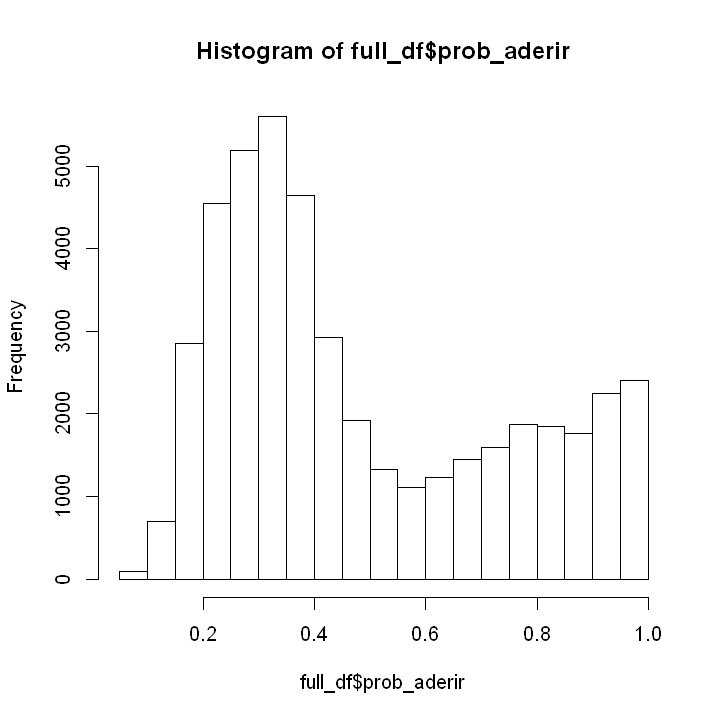

In [499]:
options(repr.plot.width = 6, repr.plot.height =6)
hist(full_df$prob_aderir)


A distribuição ficou muito aproximada a curva bimodal.

## 4) Apresentar as conclusões da análise realizada.

- Percebemos forte influência das variáveis de contexto na decisão em aderir a campanha.  
- o Mês de maio, teve uma influencia mais forte do que os outros na probabilade
- Os contatos serem feitos por telefone são o quarto fator condicional mais relevante na probabilidade de adesão.

 
